In [3]:
import matplotlib
matplotlib.use('Agg')

import numpy as np
import collections
from os.path import expanduser
from tqdm import tqdm
import csv

from scipy.stats import sem
from scipy.stats import pearsonr

# This is a bit of magic to make matplotlib figures appear inline in the
# notebook rather than in a new window.
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

plt.style.use('deepretina')

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'timezone', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/style/core.py:53: UserWarning: Style includes a parameter, 'interactive', that is not related to style.  Ignoring
  "to style.  Ignoring".format(key))
/home/lane/.local/lib/python3.5/site-packages/matplotlib-2.0.0-py3.5-linux-x86_64.egg/matplotlib/__init__.py:917: UserWarning: axes.ho

In [2]:
data_path = expanduser('~/data/katie/')
control_name = '010917_control_normalized.csv'
experimental_name = '010917_experimental_normalized.csv'

In [20]:
# control_list = []
# with open(data_path + control_name, 'rb') as controlfile:
#     control_reader = csv.reader(controlfile)
#     for row in control_reader:
#         control_list.append(row)

In [61]:
controlfile = open(data_path + control_name, 'r')
control_reader = csv.reader(controlfile)

In [62]:
control_list = collections.defaultdict(list)
labels = []
for idl,line in enumerate(control_reader):
    if idl == 0:
        for l in line:
            labels.append(l)
    else:
        if line[0] != '':
            print(line[0])
            for idi,l in enumerate(line):
                if l == '':
                    control_list[labels[idi]].append(np.nan)
                elif idi > 0:
                    control_list[labels[idi]].append(float(l))
                elif idi == 0:
                    control_list[labels[idi]].append(l)

1
2
3
4
5
6
7
6.1
7.1
6.2
7.2
6.3
7.3
6.4
7.4
6.5
7.5
6.6
7.6
6.7
7.7
6.8
7.8
6.9
7.9
6.10
7.10
6.11
7.11
6.12
7.12
6.13
7.13
6.14
7.14
6.15
7.15
6.16
7.16
6.17
7.17
6.18
7.18
6.19
7.19
6.20
7.20
6.21
7.21
6.22
7.22
6.23
7.23
6.24
7.24
6.25
7.25


In [63]:
for m in control_list['Mouse']:
    # mouse id x day
    this_split = m.split('.')
    control_list['mouse_id'] = this_split[0]

In [64]:
variables = [k for k in control_list.keys() if k not in ['mouse_id', 'Mouse', 'DPI', 'Infected (1/0)',
                                                        'Parasitemia', 'Parasite Density', 'Accuri', 'Cells',
                                                        'palmitoyl-arachidonoyl-glycerol (16:0/20:4) [2]*',
                                                        'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*']]

In [65]:
variables

['MIP-1b',
 'dihomo-linoleoylcarnitine (C20:2)*',
 'maleate',
 'glycerophosphoglycerol',
 'MIP-1a',
 'iminodiacetate (IDA)',
 'Erythrocyte-B',
 'isovalerylcarnitine (C5)',
 'alpha-hydroxyisovalerate',
 'dihomo-linolenate (20:3n3 or n6)',
 'stearate (18:0)',
 'glycerophosphoethanolamine',
 'N-palmitoyl-sphinganine (d18:0/16:0)',
 'N-palmitoyltaurine',
 'propionylglycine',
 'kynurenate',
 '1-palmitoyl-2-gamma-linolenoyl-GPC (16:0/18:3n6)*',
 'betaine',
 'sphinganine',
 '2-methylbutyrylglycine',
 'cystine',
 '1-stearoyl-2-arachidonoyl-GPC (18:0/20:4)',
 'formiminoglutamate',
 '5-hydroxyhexanoate',
 'tricosanoyl sphingomyelin (d18:1/23:0)*',
 '1-oleoyl-GPC (18:1)',
 'sebacate (decanedioate)',
 '1-stearoyl-2-linoleoyl-GPI (18:0/18:2)',
 '1,2-dilinoleoyl-GPC (18:2/18:2)',
 '1-stearoyl-2-linoleoyl-GPC (18:0/18:2)*',
 '1-(1-enyl-palmitoyl)-2-oleoyl-GPC (P-16:0/18:1)*',
 '1,2,3-benzenetriol sulfate (2)',
 'trans-4-hydroxyproline',
 '1-linoleoyl-2-arachidonoyl-GPC (18:2/20:4n6)*',
 'alpha-ketogl

In [79]:
control_list[variables[6]]

[1.130816939,
 0.658187951,
 0.884048273,
 0.806187483,
 1.017596672,
 0.590877902,
 0.670953607,
 0.810196013,
 0.788816789,
 0.766883893,
 0.687912618,
 0.684775046,
 0.582908837,
 0.900198826,
 1.009429828,
 0.962120649,
 0.835965458,
 0.718135494,
 1.065637396,
 0.816928891,
 1.013570147,
 0.791704141,
 0.99814412,
 1.081217952,
 1.256444962,
 1.143472113,
 1.044382572,
 0.941869434,
 1.311096507,
 0.782668609,
 1.556527498,
 1.043618183,
 0.975047084,
 0.794850237,
 0.923449609,
 0.781774584,
 1.175105972,
 0.913395566,
 0.792317515,
 0.978645835,
 0.96755289,
 0.984260121,
 0.775627491,
 1.159498495,
 0.905514751,
 0.620677835,
 0.932050577,
 0.858380418,
 1.007239093,
 0.877530516,
 0.847546791,
 0.85468538,
 0.890499245,
 0.696981019,
 0.536249929,
 0.615539854,
 1.062090923]

In [67]:
time = control_list['DPI']

In [86]:
from aesthetics import plotting

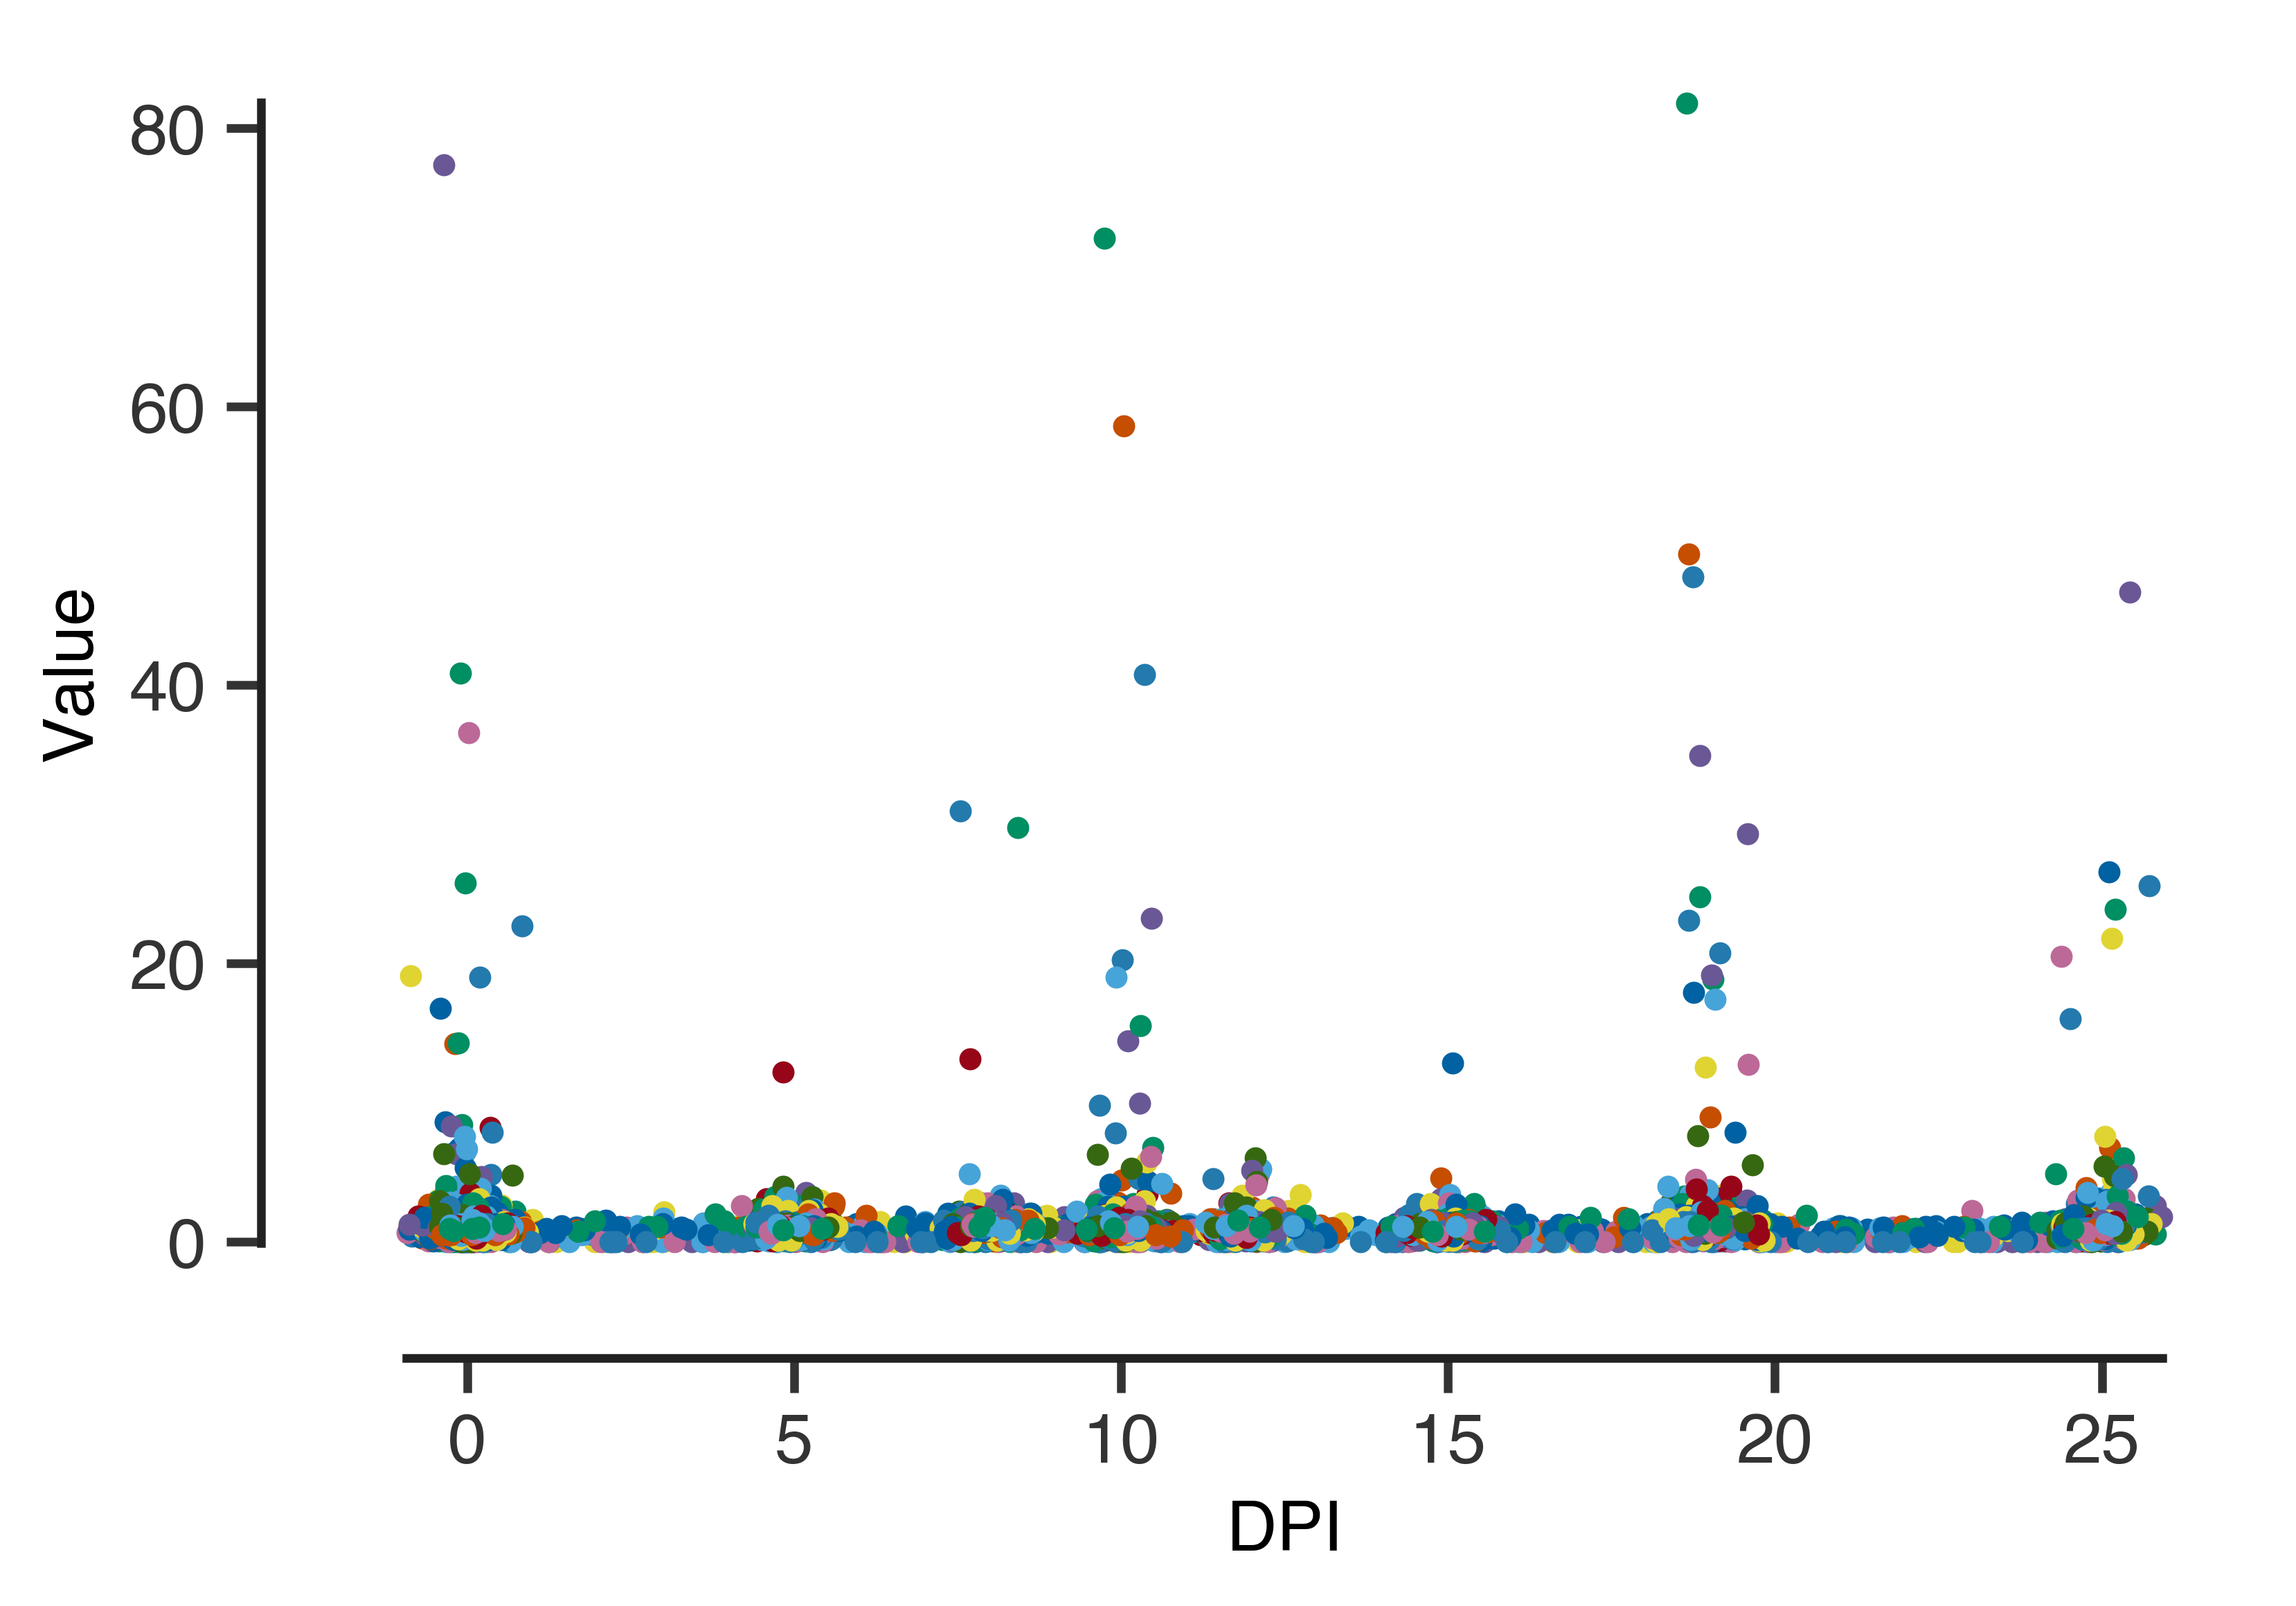

In [91]:
size = 8
for v in variables:
    plt.scatter(time+0.3*np.random.randn(len(control_list[v])), control_list[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

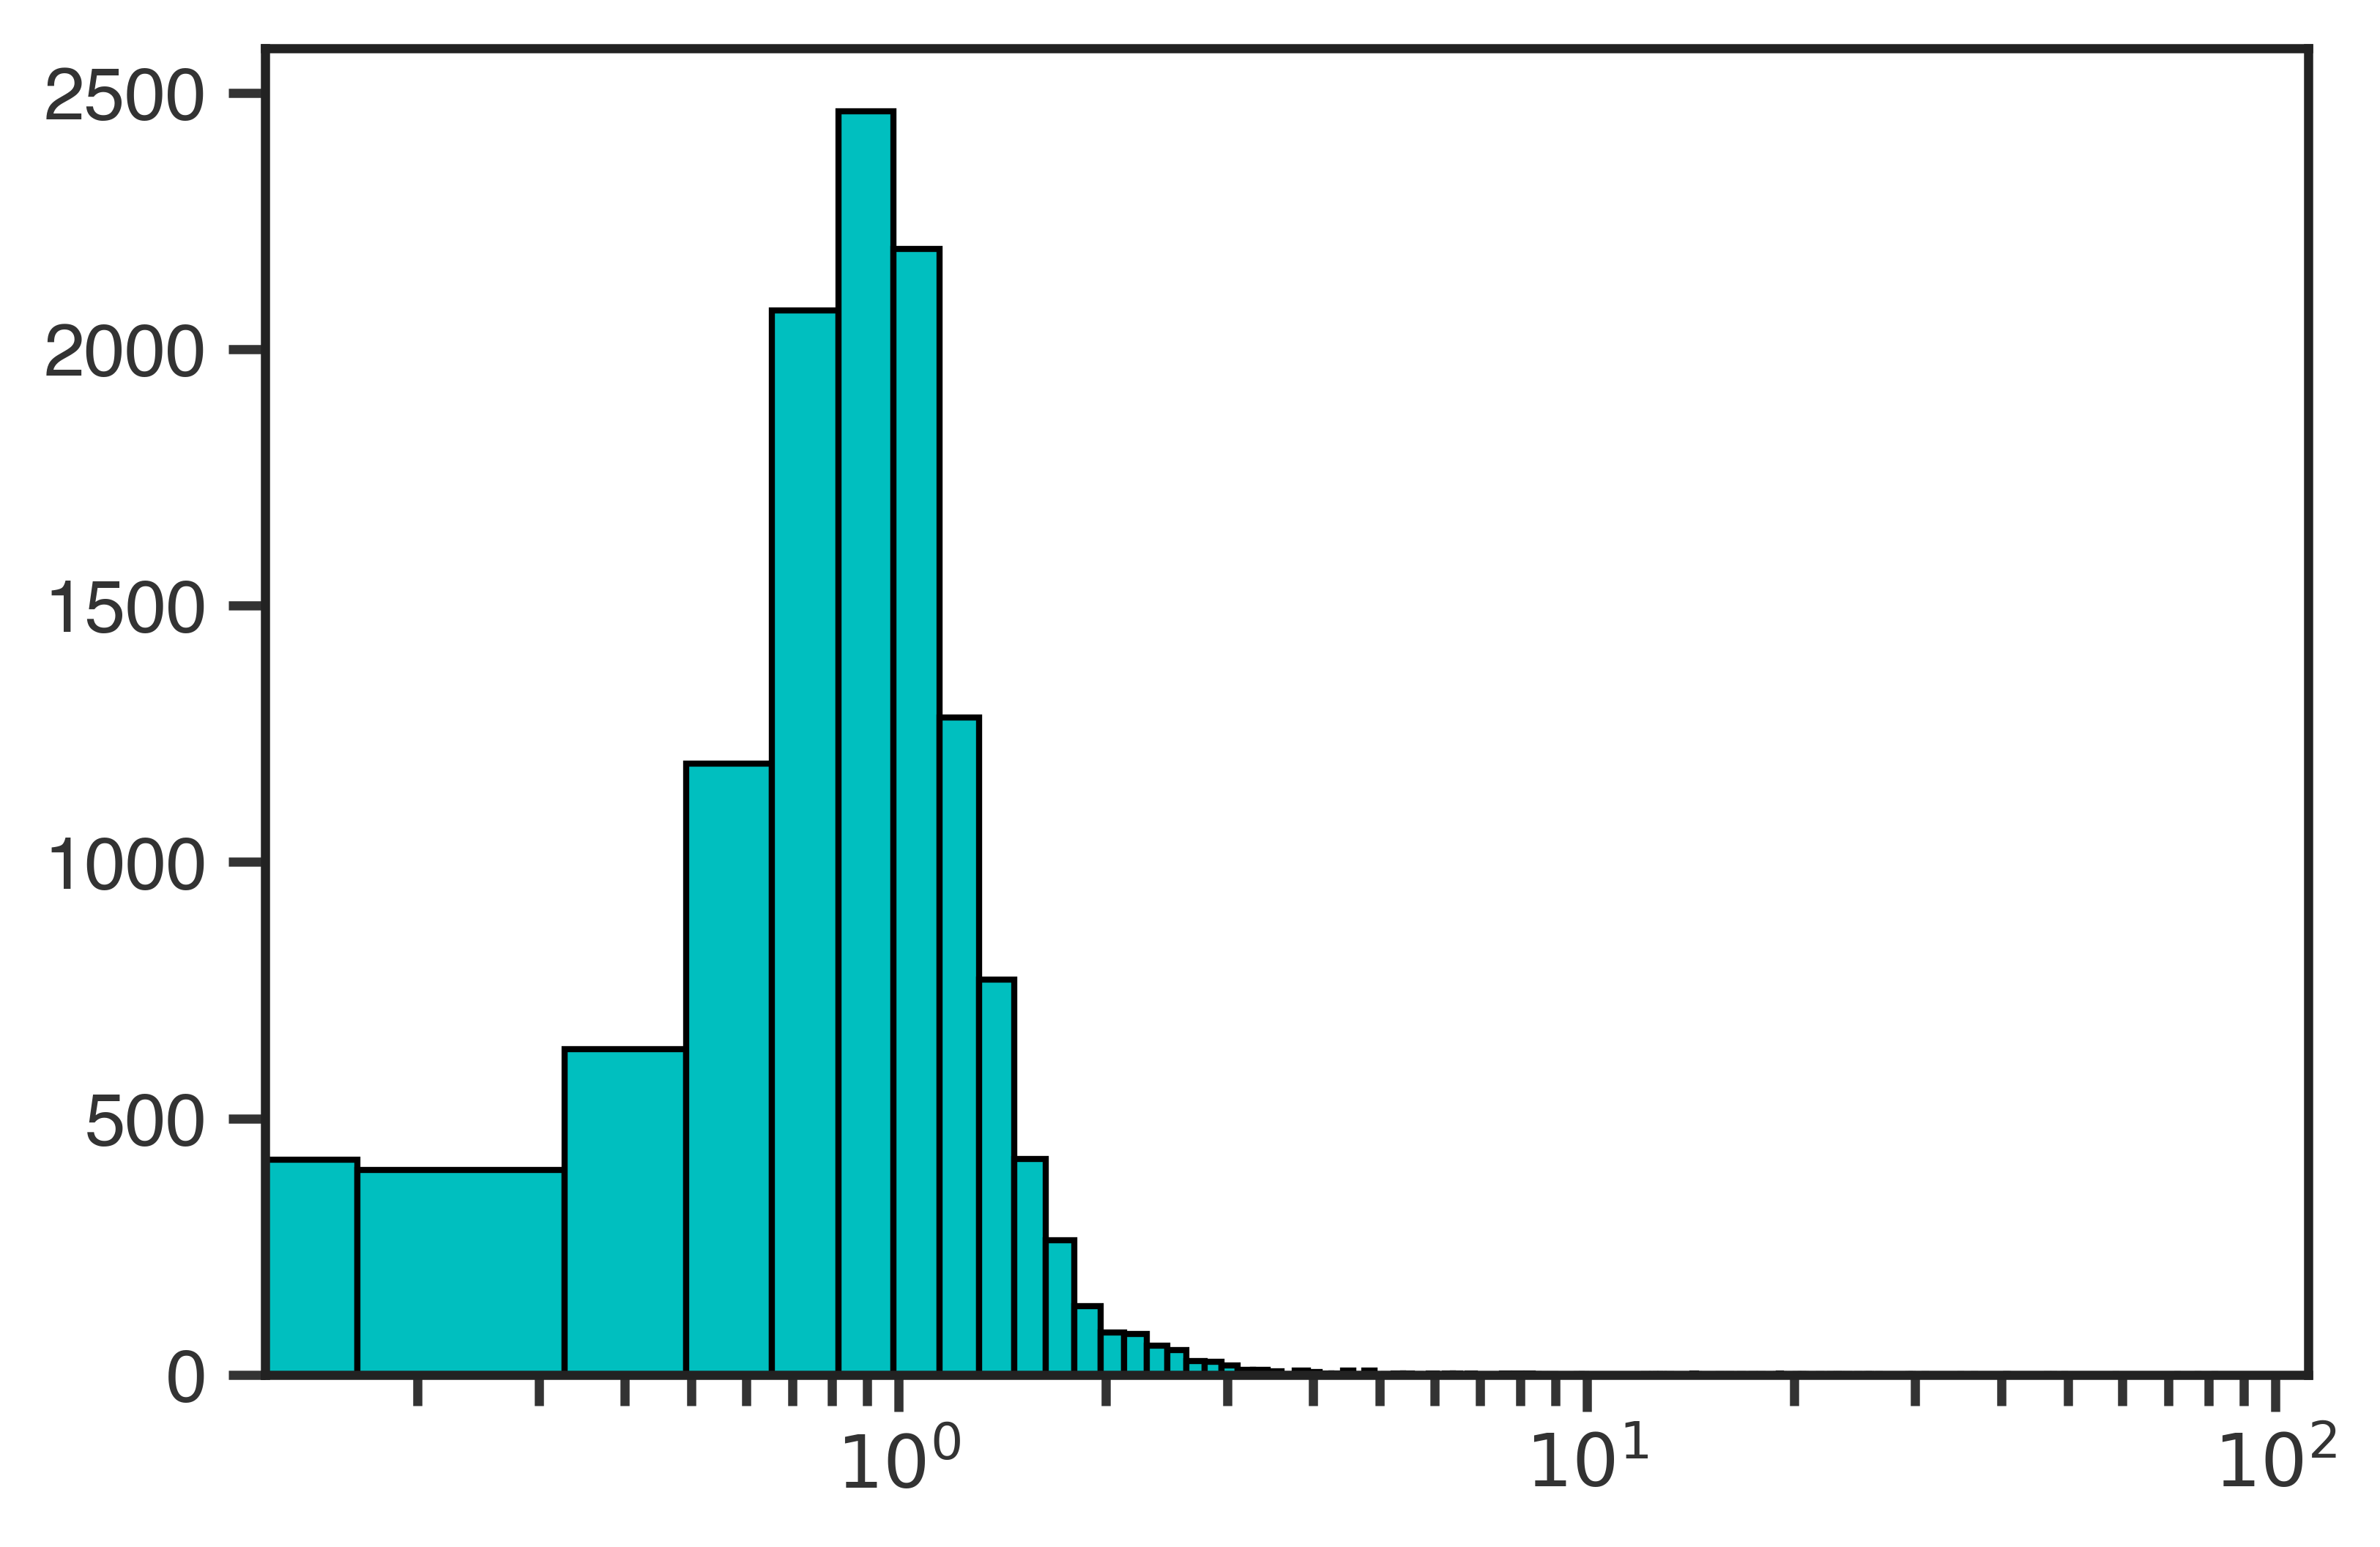

In [94]:
all_control_values = np.array([control_list[v] for v in variables]).flatten()
all_control_values = all_control_values[~np.isnan(all_control_values)]
count, bins = np.histogram(all_control_values, bins=500)
bin_width = np.mean(np.diff(bins))
plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='c', edgecolor='k')
plt.xscale('log')

In [133]:
control_means = collections.defaultdict(list)
control_std = collections.defaultdict(list)
control_variance = collections.defaultdict(list)
for v in variables:
    control_means[v] = np.nanmean(control_list[v])
    control_std[v] = np.nanstd(control_list[v])
    control_variance[v] = np.nanvar(control_list[v])

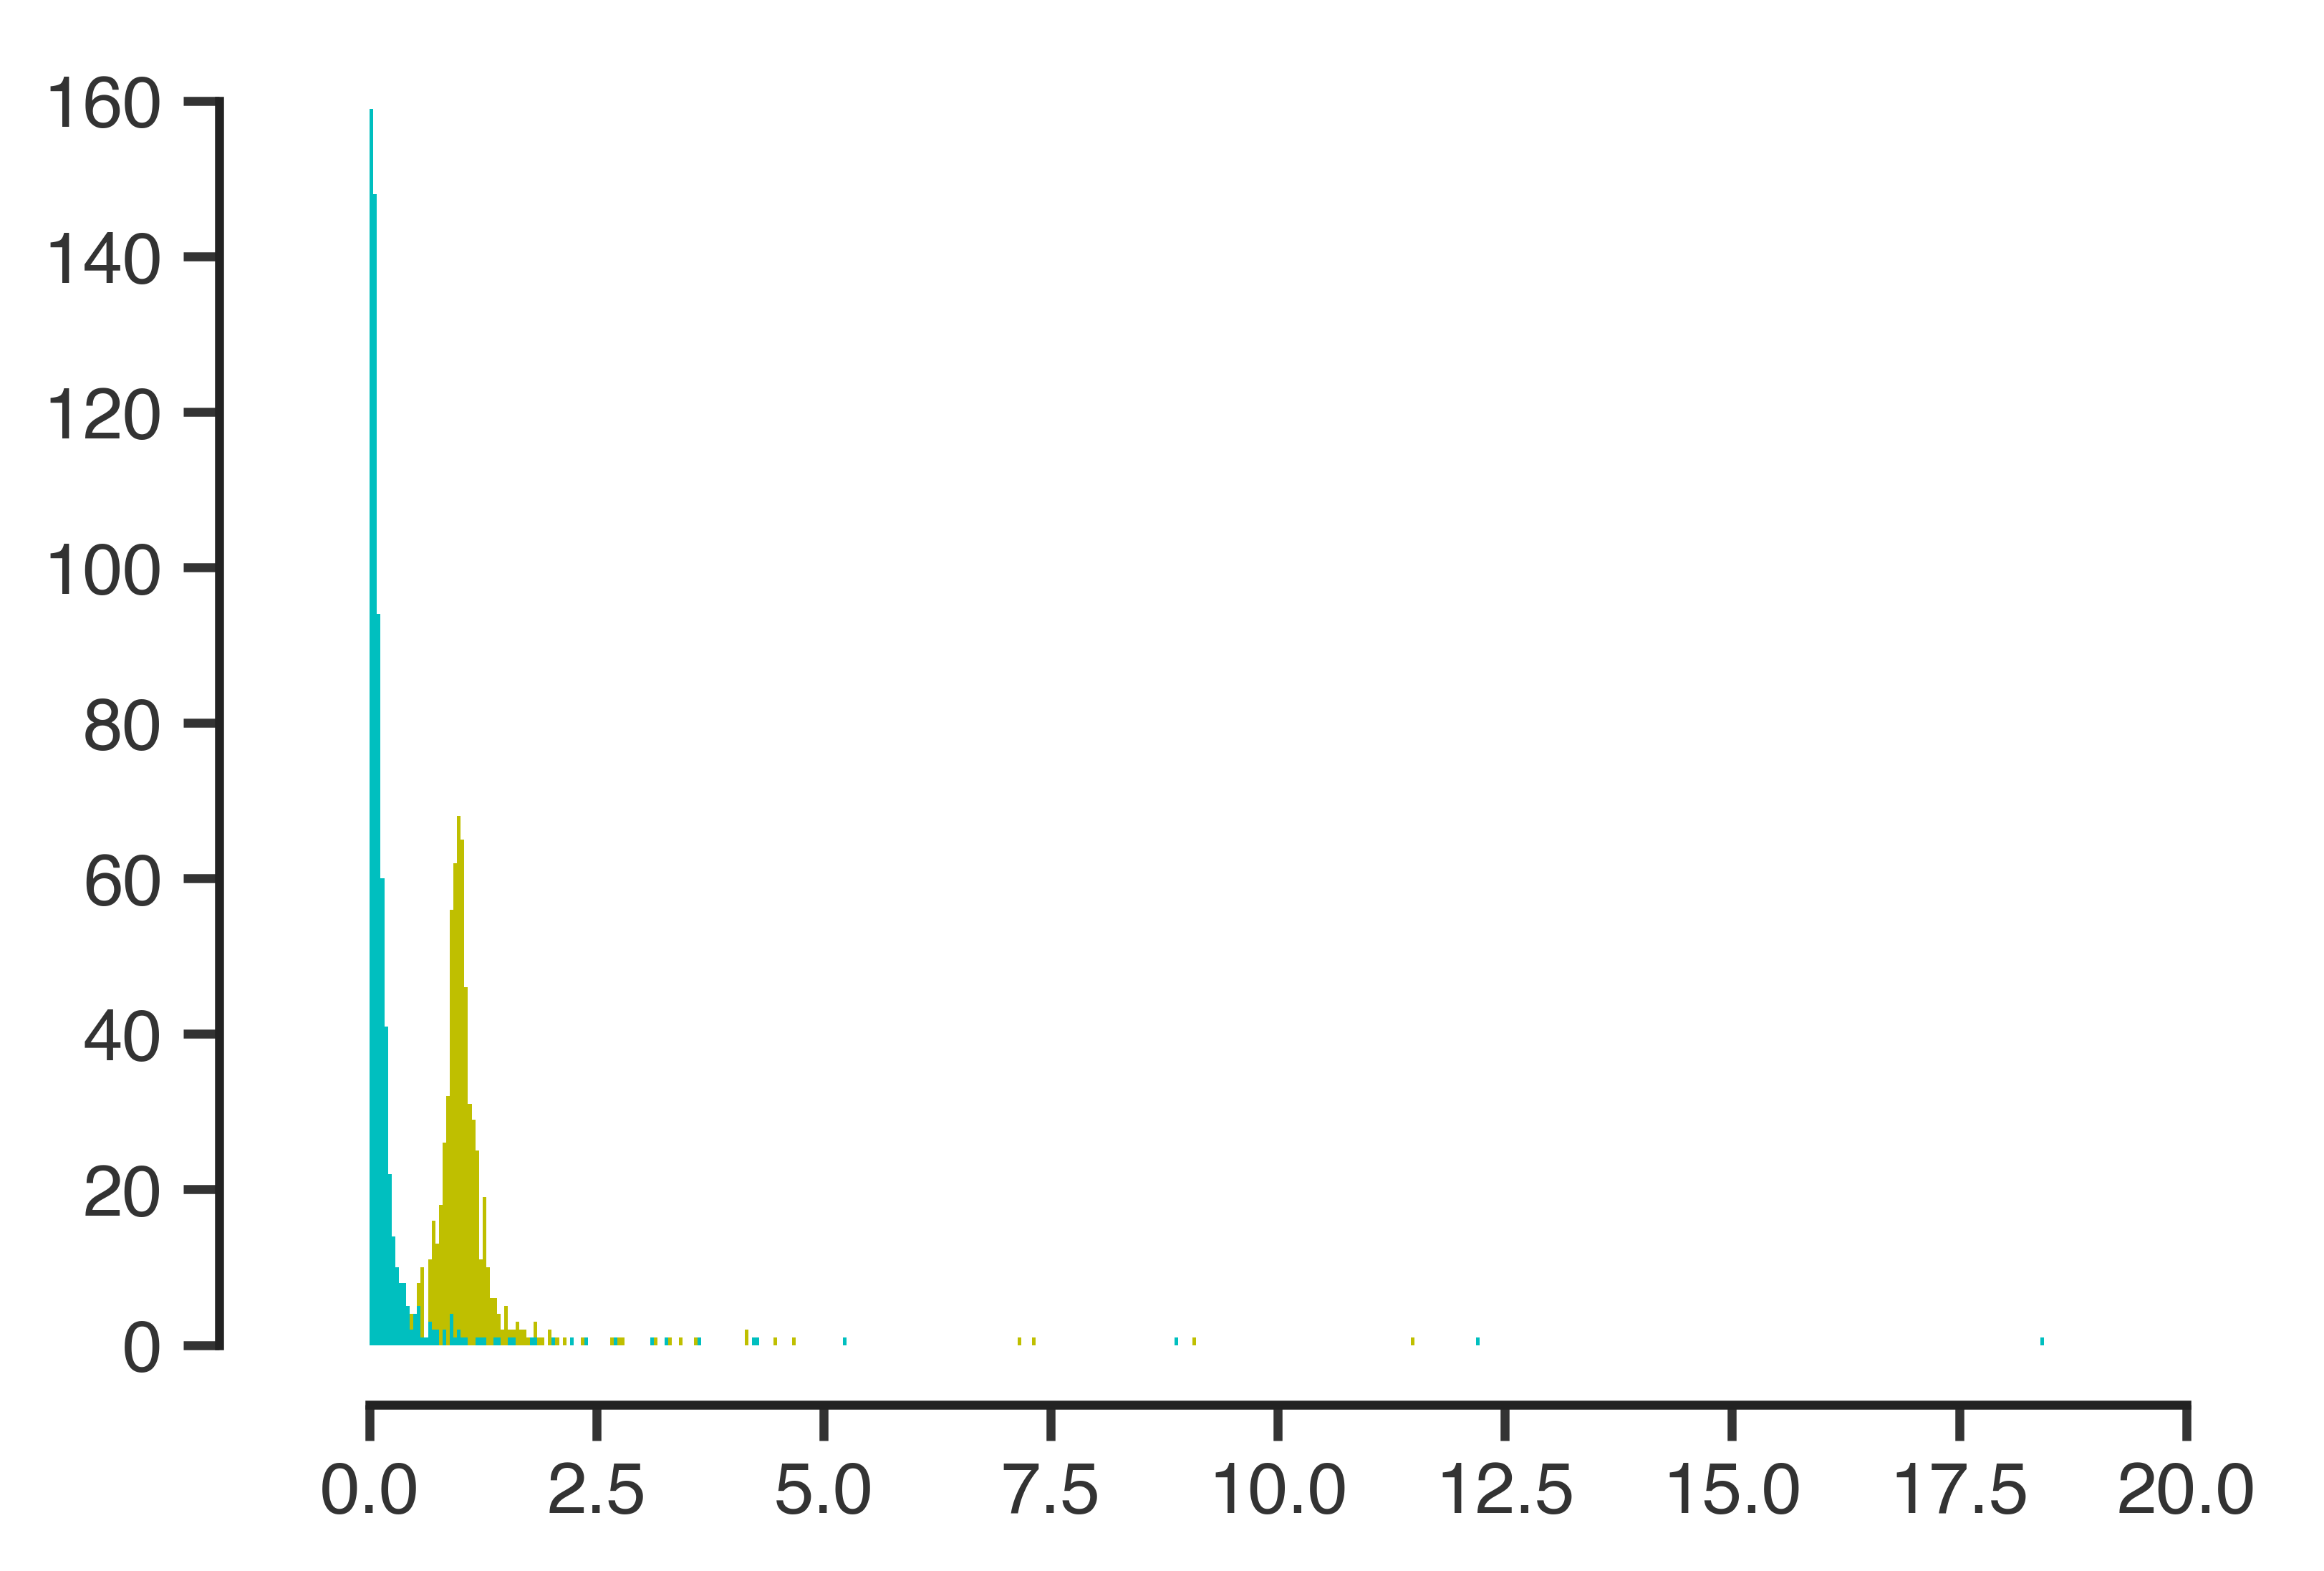

In [100]:
all_control_means = np.array([control_means[v] for v in variables]).flatten()
all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,20,500)
bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_control_means, bins=bins)
count_variances, bins = np.histogram(all_control_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y')
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c')
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

In [101]:
np.min(all_control_variances)

0.0

In [102]:
for v in variables:
    if control_variance[v] == 0.0:
        print(v)

Direct Bilirubin
lactosyl-N-palmitoyl-sphingosine (d18:1/16:0)
cerotoylcarnitine (C26)*
GGT


### Modify variables to include variables that have zero variance

In [103]:
variables = [k for k in control_list.keys() if k not in ['mouse_id', 'Mouse', 'DPI', 'Infected (1/0)',
                                                        'Parasitemia', 'Parasite Density', 'Accuri', 'Cells',
                                                        'palmitoyl-arachidonoyl-glycerol (16:0/20:4) [2]*',
                                                        'palmitoyl-linoleoyl-glycerol (16:0/18:2) [1]*',
                                                        'Direct Bilirubin', 
                                                         'lactosyl-N-palmitoyl-sphingosine (d18:1/16:0)',
                                                         'cerotoylcarnitine (C26)*', 'GGT']]

# Z-score these babies

In [104]:
from scipy.stats import zscore

In [114]:
normalized_control = collections.defaultdict(list)
for v in variables:
    normalized_control[v] = (control_list[v] - np.nanmean(control_list[v]))/np.nanstd(control_list[v])

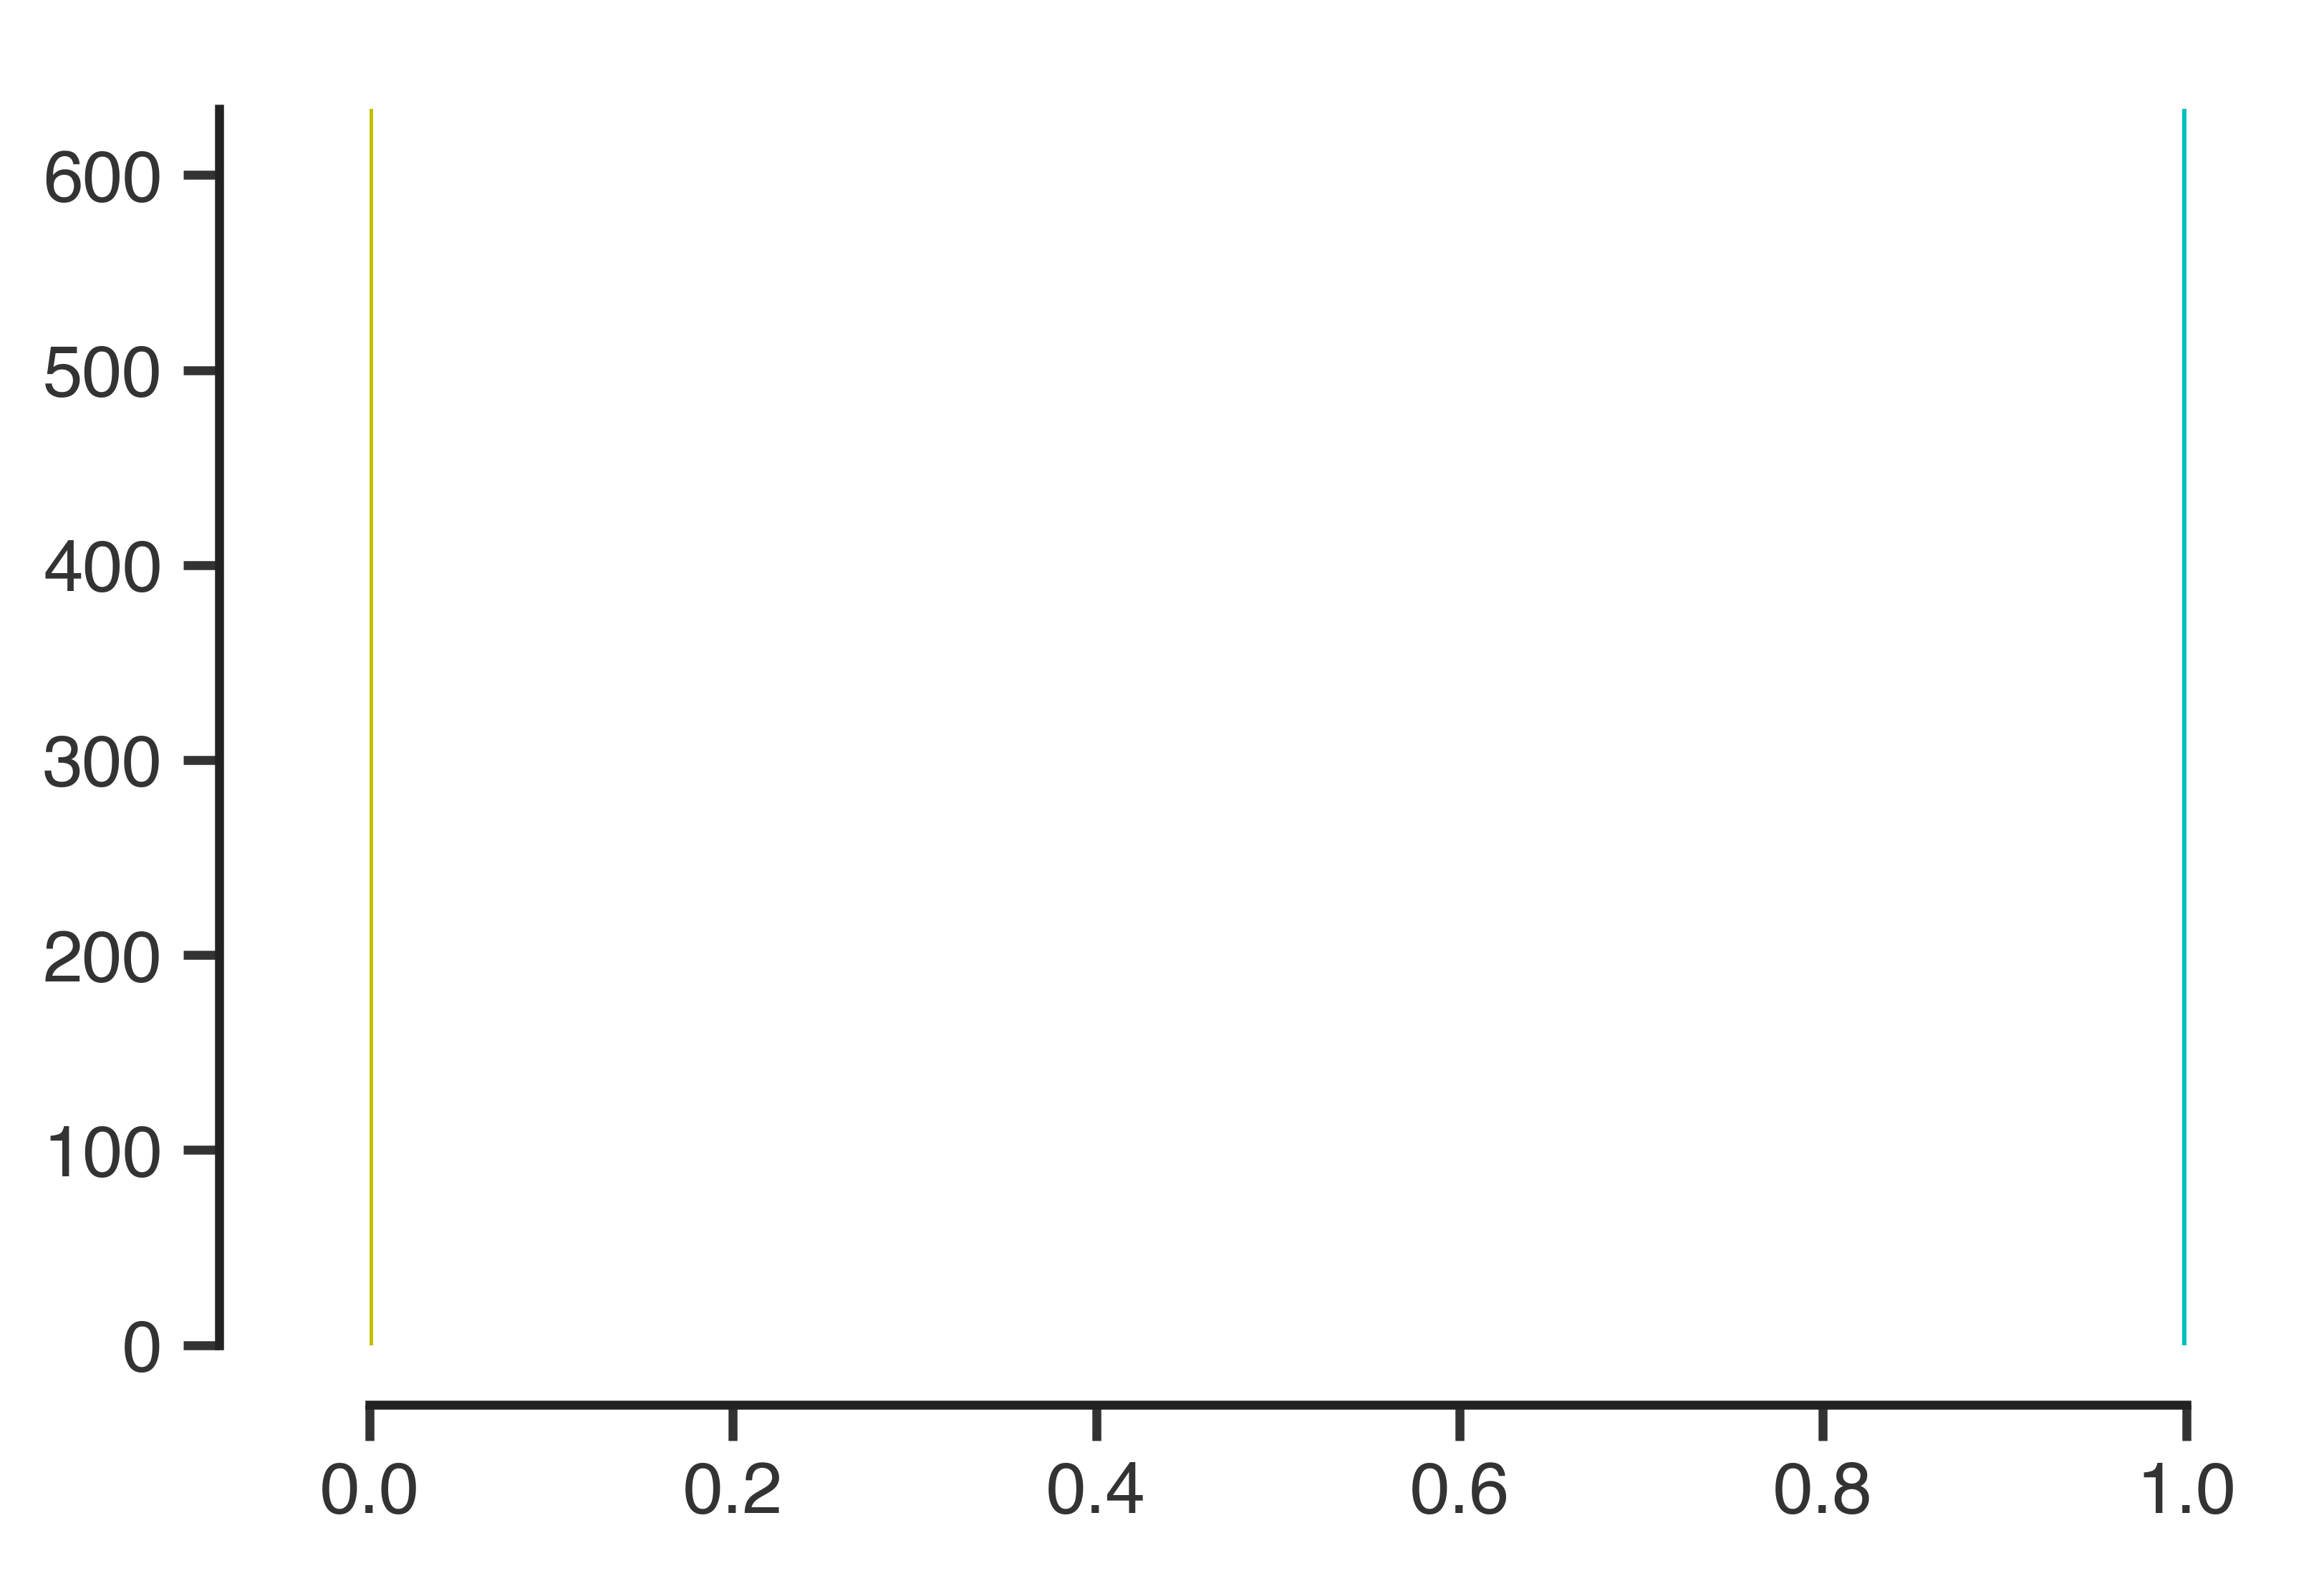

In [119]:
all_control_means = np.array([np.nanmean(normalized_control[v]) for v in variables]).flatten()
all_control_variances = np.array([np.nanvar(normalized_control[v]) for v in variables]).flatten()

bins = np.linspace(min([min(all_control_means), min(all_control_variances)]),
                   max([max(all_control_means), max(all_control_variances)]),500)

bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_control_means, bins=bins)
count_variances, bins = np.histogram(all_control_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y')
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c')
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

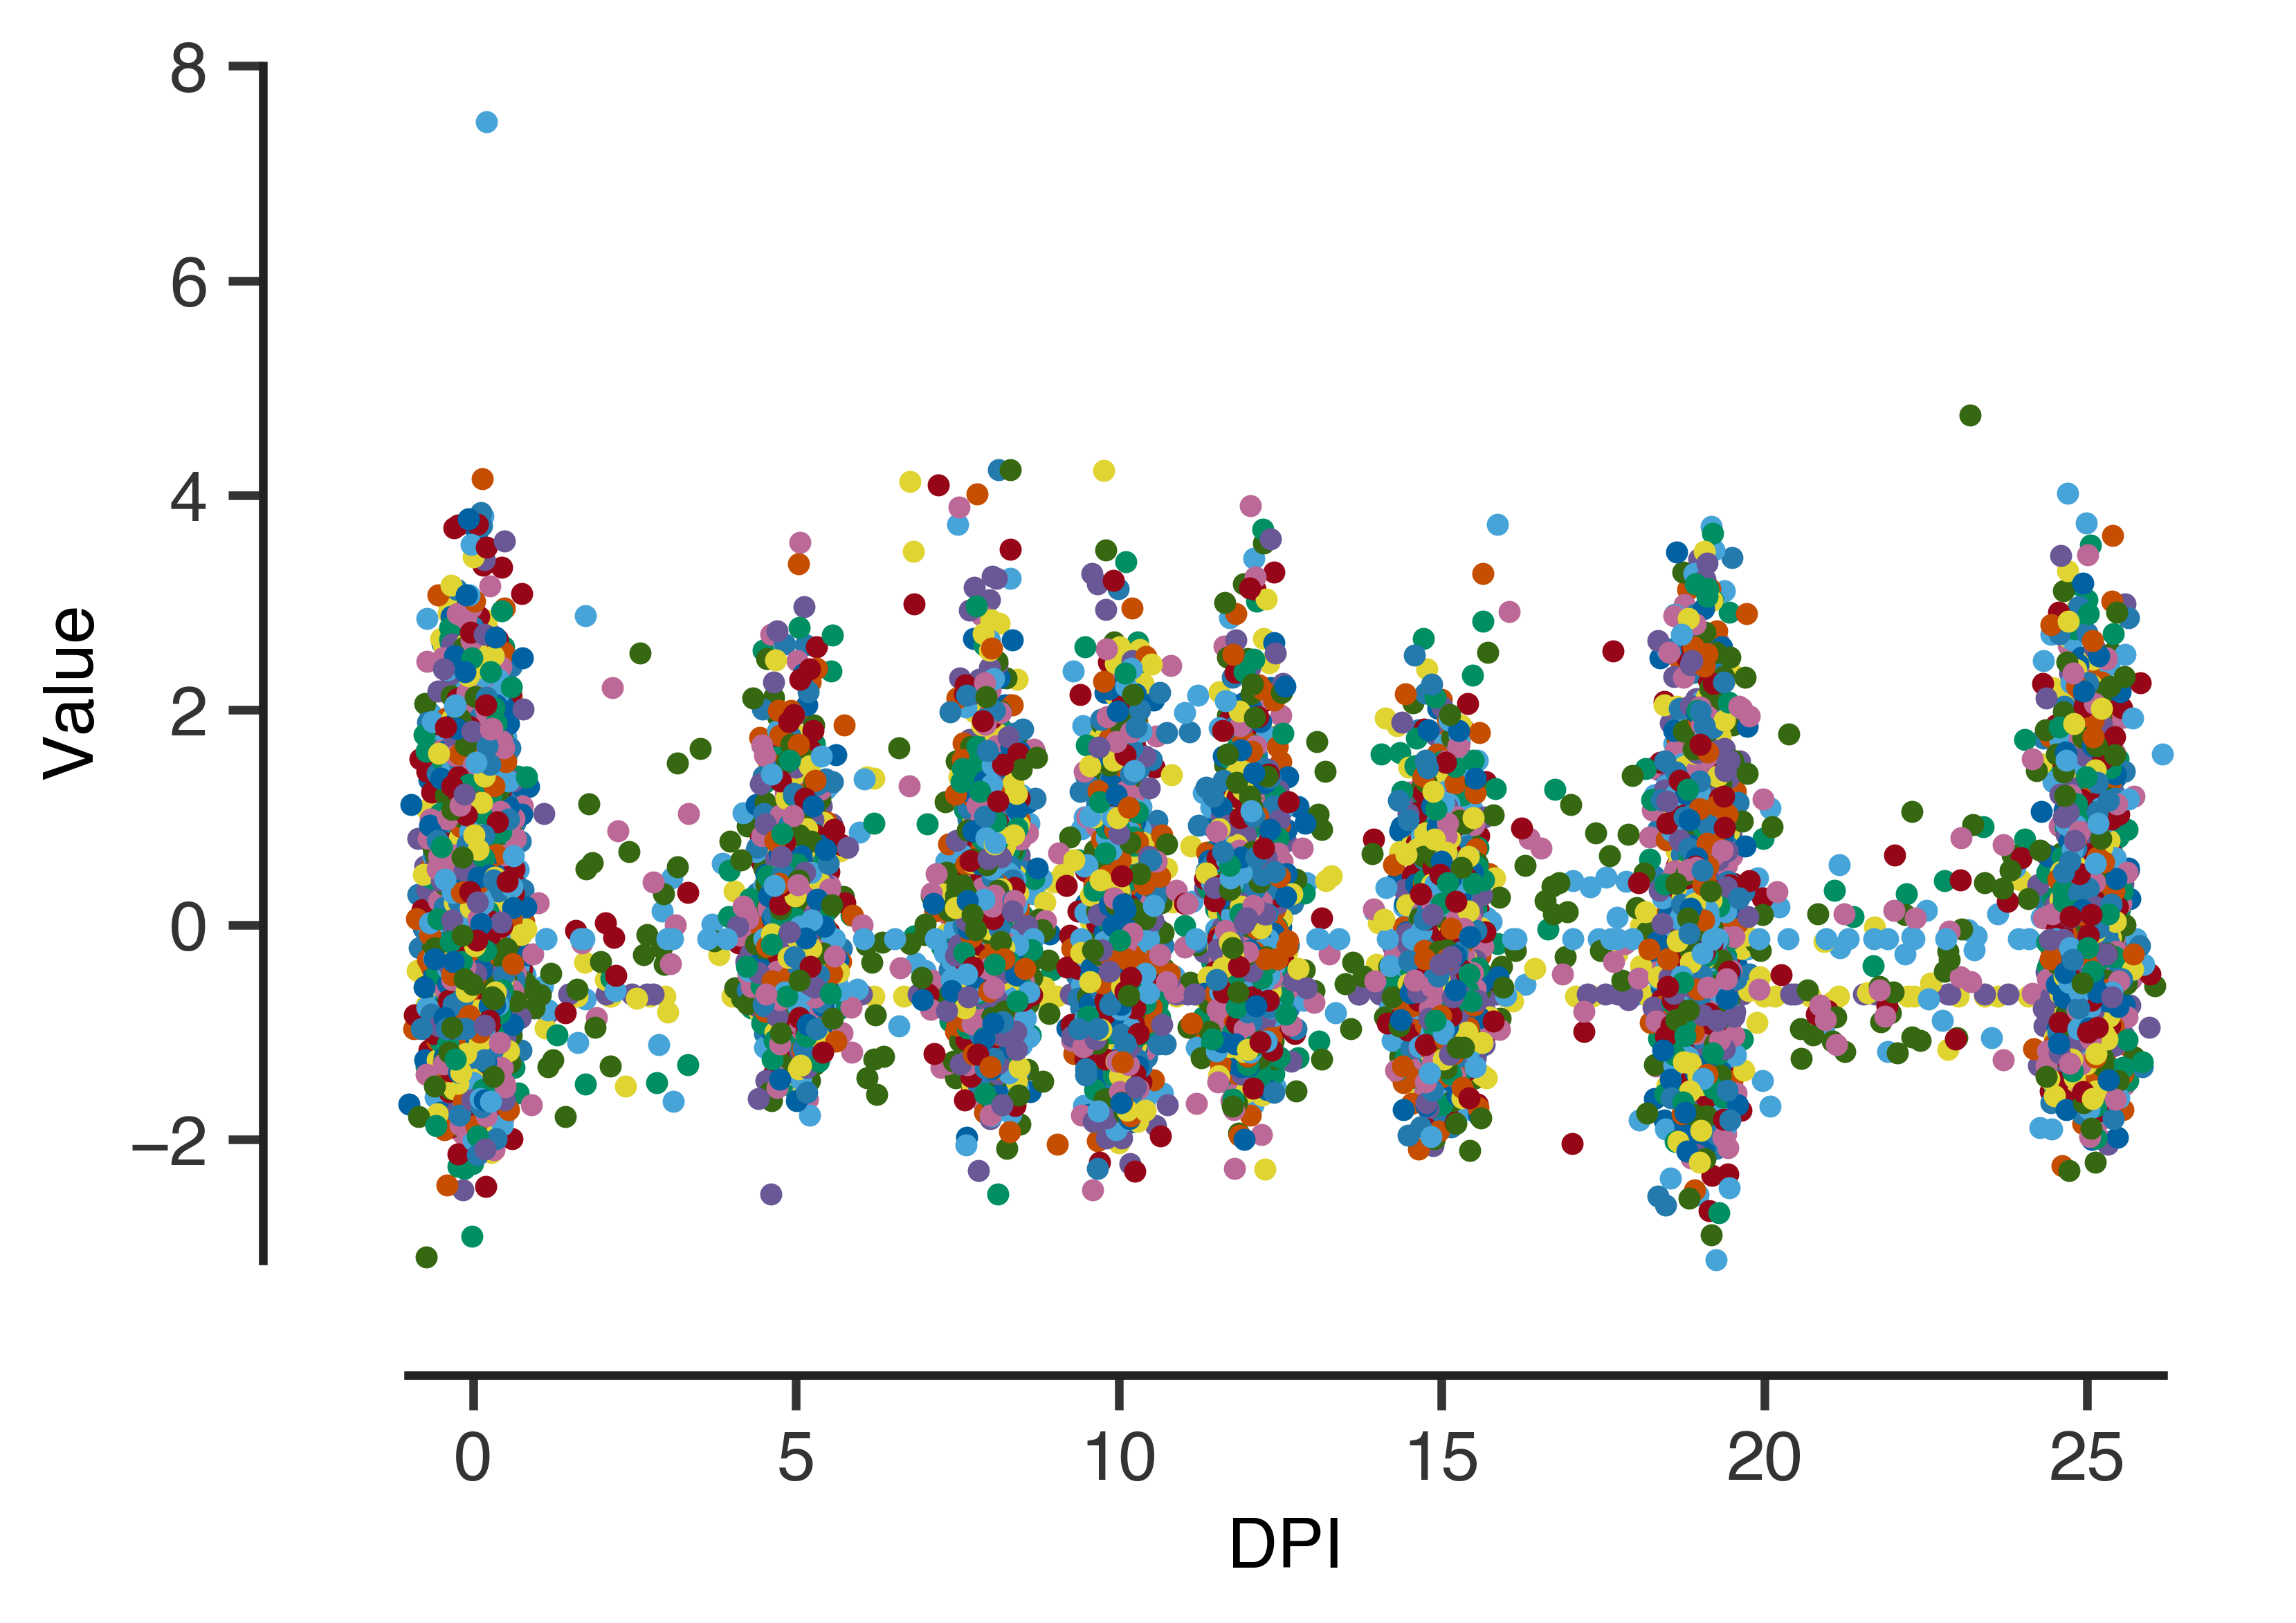

In [120]:
size = 8
for v in variables:
    plt.scatter(time+0.3*np.random.randn(len(normalized_control[v])), normalized_control[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

# Load the experimental data!!!

In [121]:
experimental_file = open(data_path + experimental_name, 'r')
experimental_reader = csv.reader(experimental_file)

In [122]:
experimental_list = collections.defaultdict(list)
labels = []
for idl,line in enumerate(experimental_reader):
    if idl == 0:
        for l in line:
            labels.append(l)
    else:
        if line[0] != '':
            print(line[0])
            for idi,l in enumerate(line):
                if l == '':
                    experimental_list[labels[idi]].append(np.nan)
                elif idi > 0:
                    experimental_list[labels[idi]].append(float(l))
                elif idi == 0:
                    experimental_list[labels[idi]].append(l)

1.1
2.1
3.1
4.1
5.1
1.2
2.2
3.2
4.2
5.2
1.3
2.3
3.3
4.3
5.3
1.4
2.4
3.4
4.4
5.4
1.5
2.5
3.5
4.5
5.5
1.6
2.6
3.6
4.6
5.6
1.7
2.7
3.7
4.7
5.7
1.8
2.8
3.8
4.8
5.8
1.9
2.9
3.9
4.9
5.9
1.10
2.10
3.10
4.10
5.10
1.11
2.11
3.11
4.11
5.11
1.12
2.12
3.12
4.12
5.12
1.13
2.13
3.13
4.13
5.13
1.14
2.14
3.14
4.14
5.14
1.15
2.15
3.15
4.15
5.15
1.16
2.16
3.16
4.16
5.16
1.17
2.17
3.17
4.17
5.17
1.18
2.18
3.18
4.18
5.18
1.19
2.19
3.19
4.19
5.19
1.20
2.20
3.20
4.20
5.20
1.21
2.21
3.21
4.21
5.21
1.22
2.22
3.22
4.22
5.22
1.23
2.23
3.23
4.23
5.23
1.24
2.24
3.24
4.24
5.24
1.25
2.25
3.25
4.25
5.25


In [123]:
for m in experimental_list['Mouse']:
    # mouse id x day
    this_split = m.split('.')
    experimental_list['mouse_id'] = this_split[0]

In [124]:
experimental_means = collections.defaultdict(list)
experimental_variance = collections.defaultdict(list)
for v in variables:
    experimental_means[v] = np.nanmean(experimental_list[v])
    experimental_variance[v] = np.nanvar(experimental_list[v])

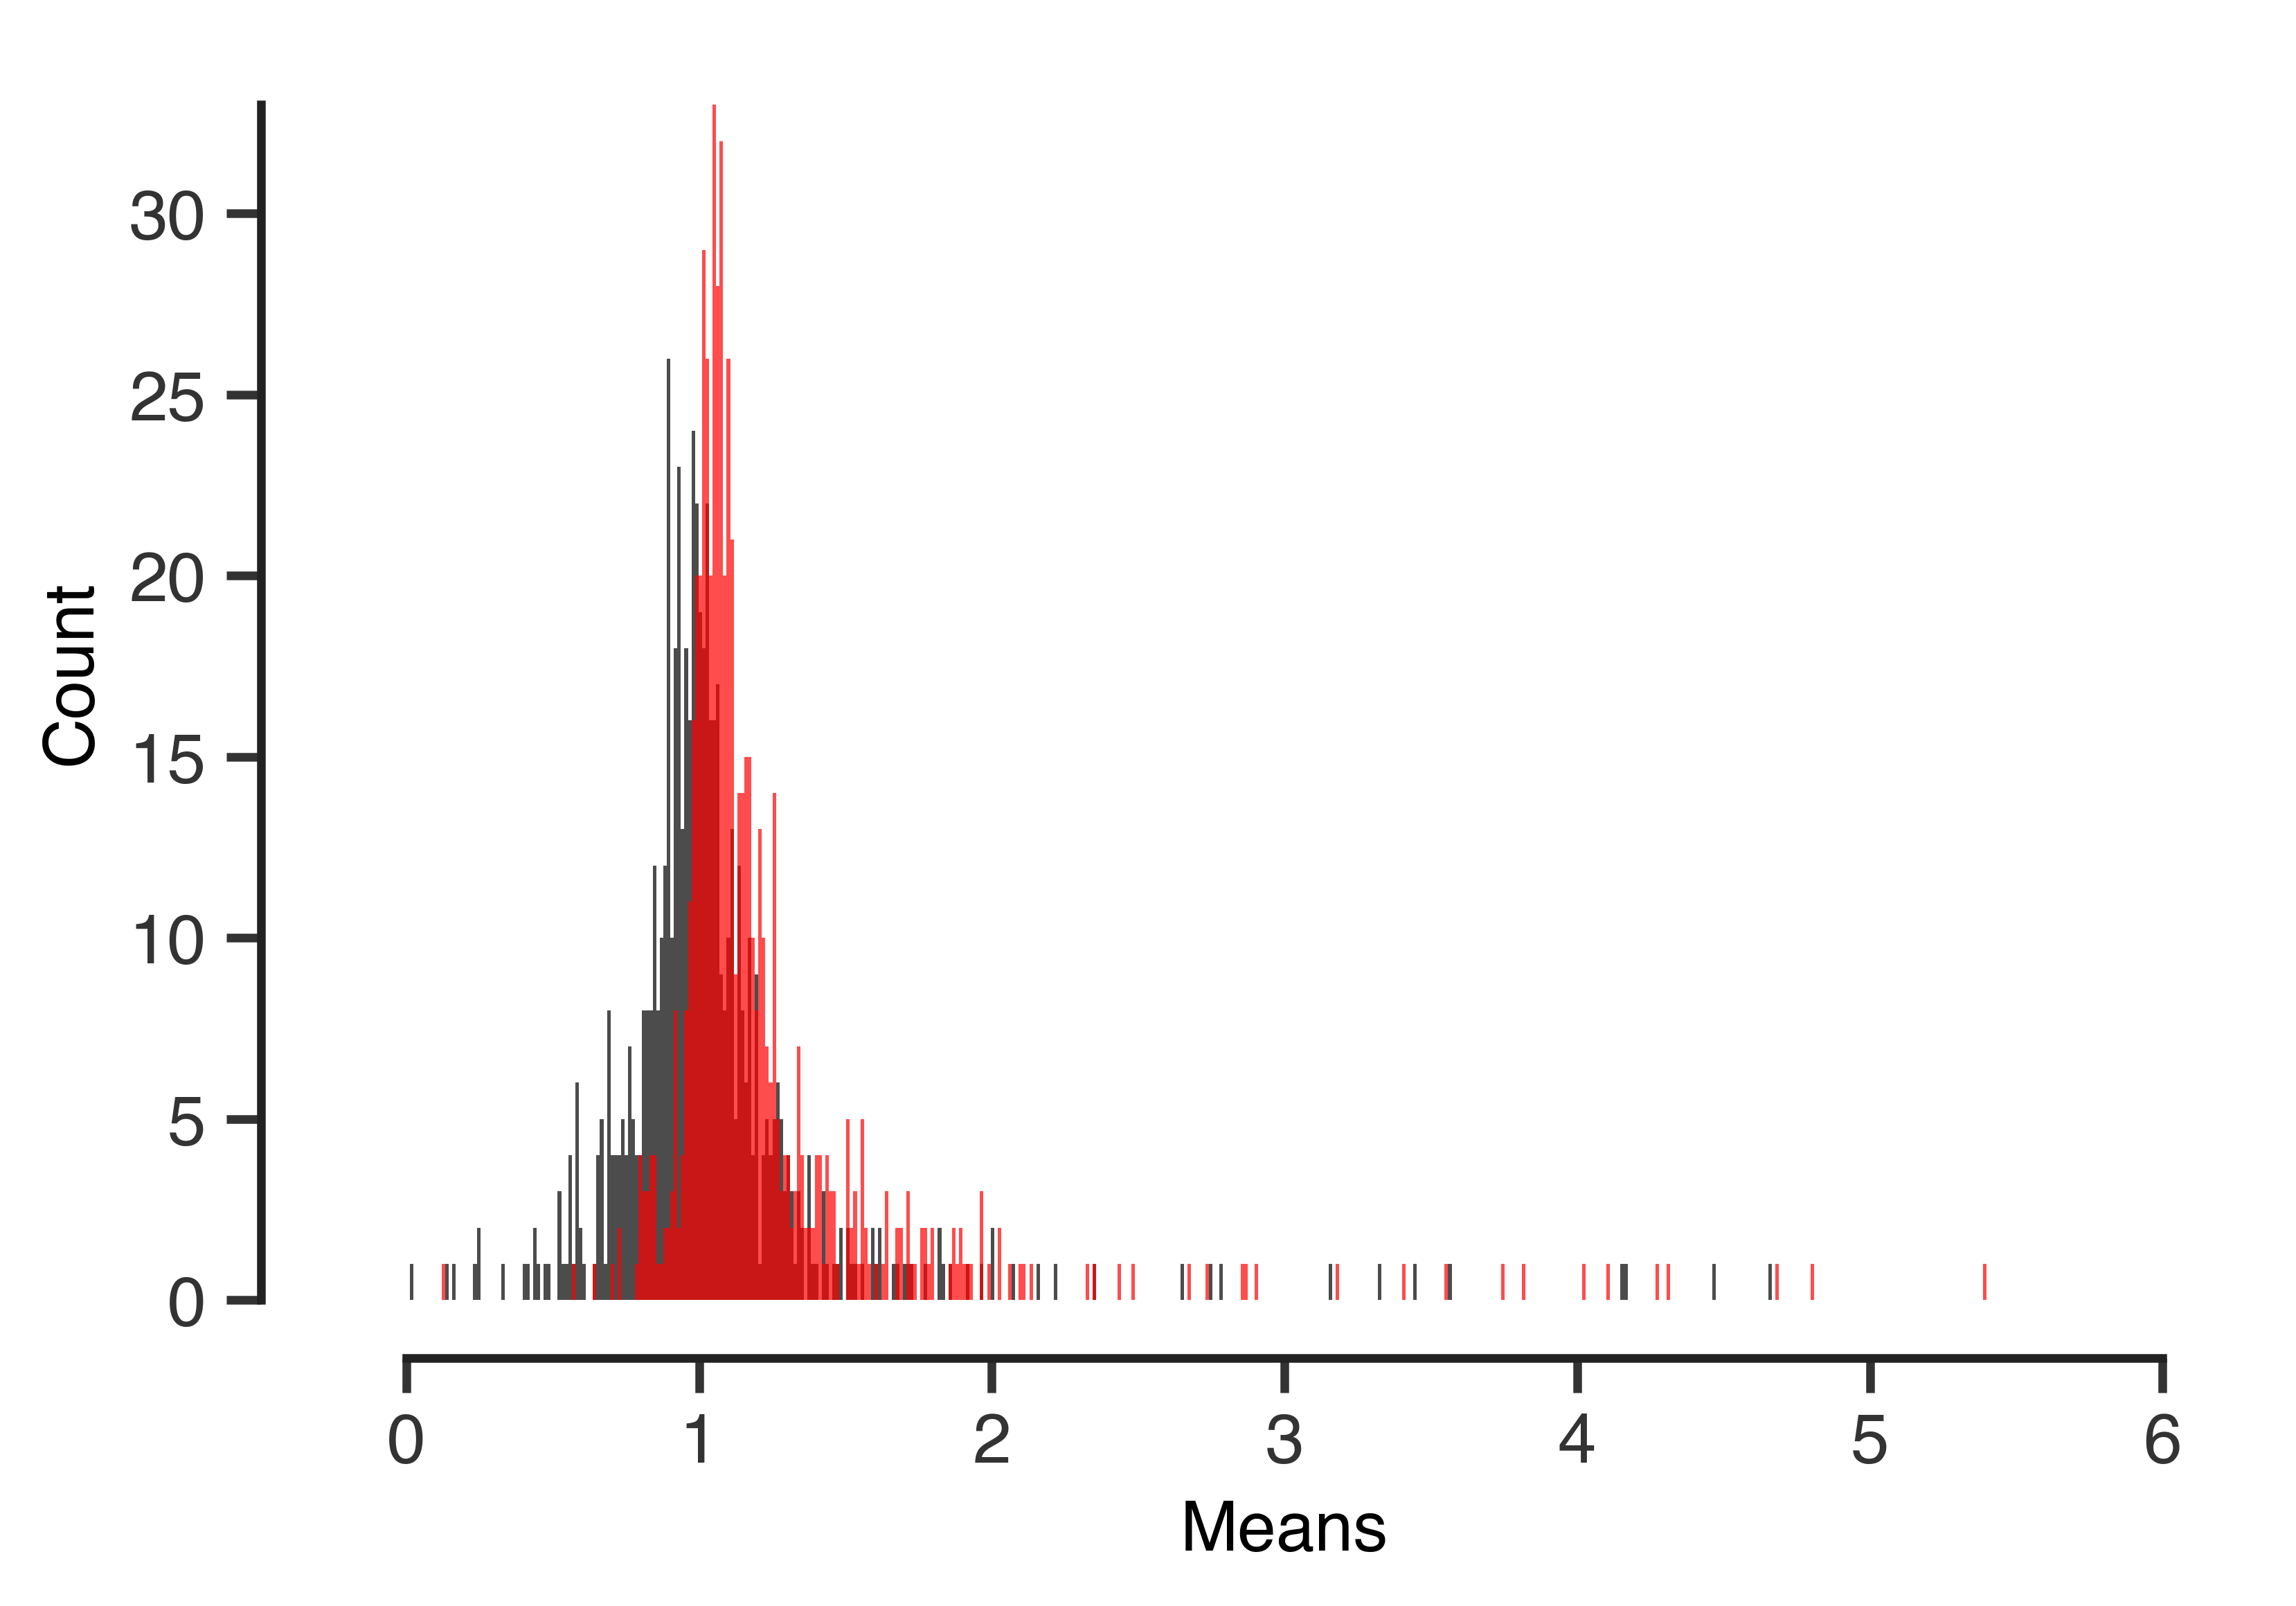

In [130]:
all_control_means = np.array([control_means[v] for v in variables]).flatten()
all_experimental_means = np.array([experimental_means[v] for v in variables]).flatten()
# all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,6,500)
bin_width = np.mean(np.diff(bins))

count_control, bins = np.histogram(all_control_means, bins=bins)
count_experimental, bins = np.histogram(all_experimental_means, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_control, width=bin_width, color='k', alpha=.7)
plt.bar(bins[:-1] + bin_width/2.0, count_experimental, width=bin_width, color='r', alpha=.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.xlabel('Means')
plt.ylabel('Count')

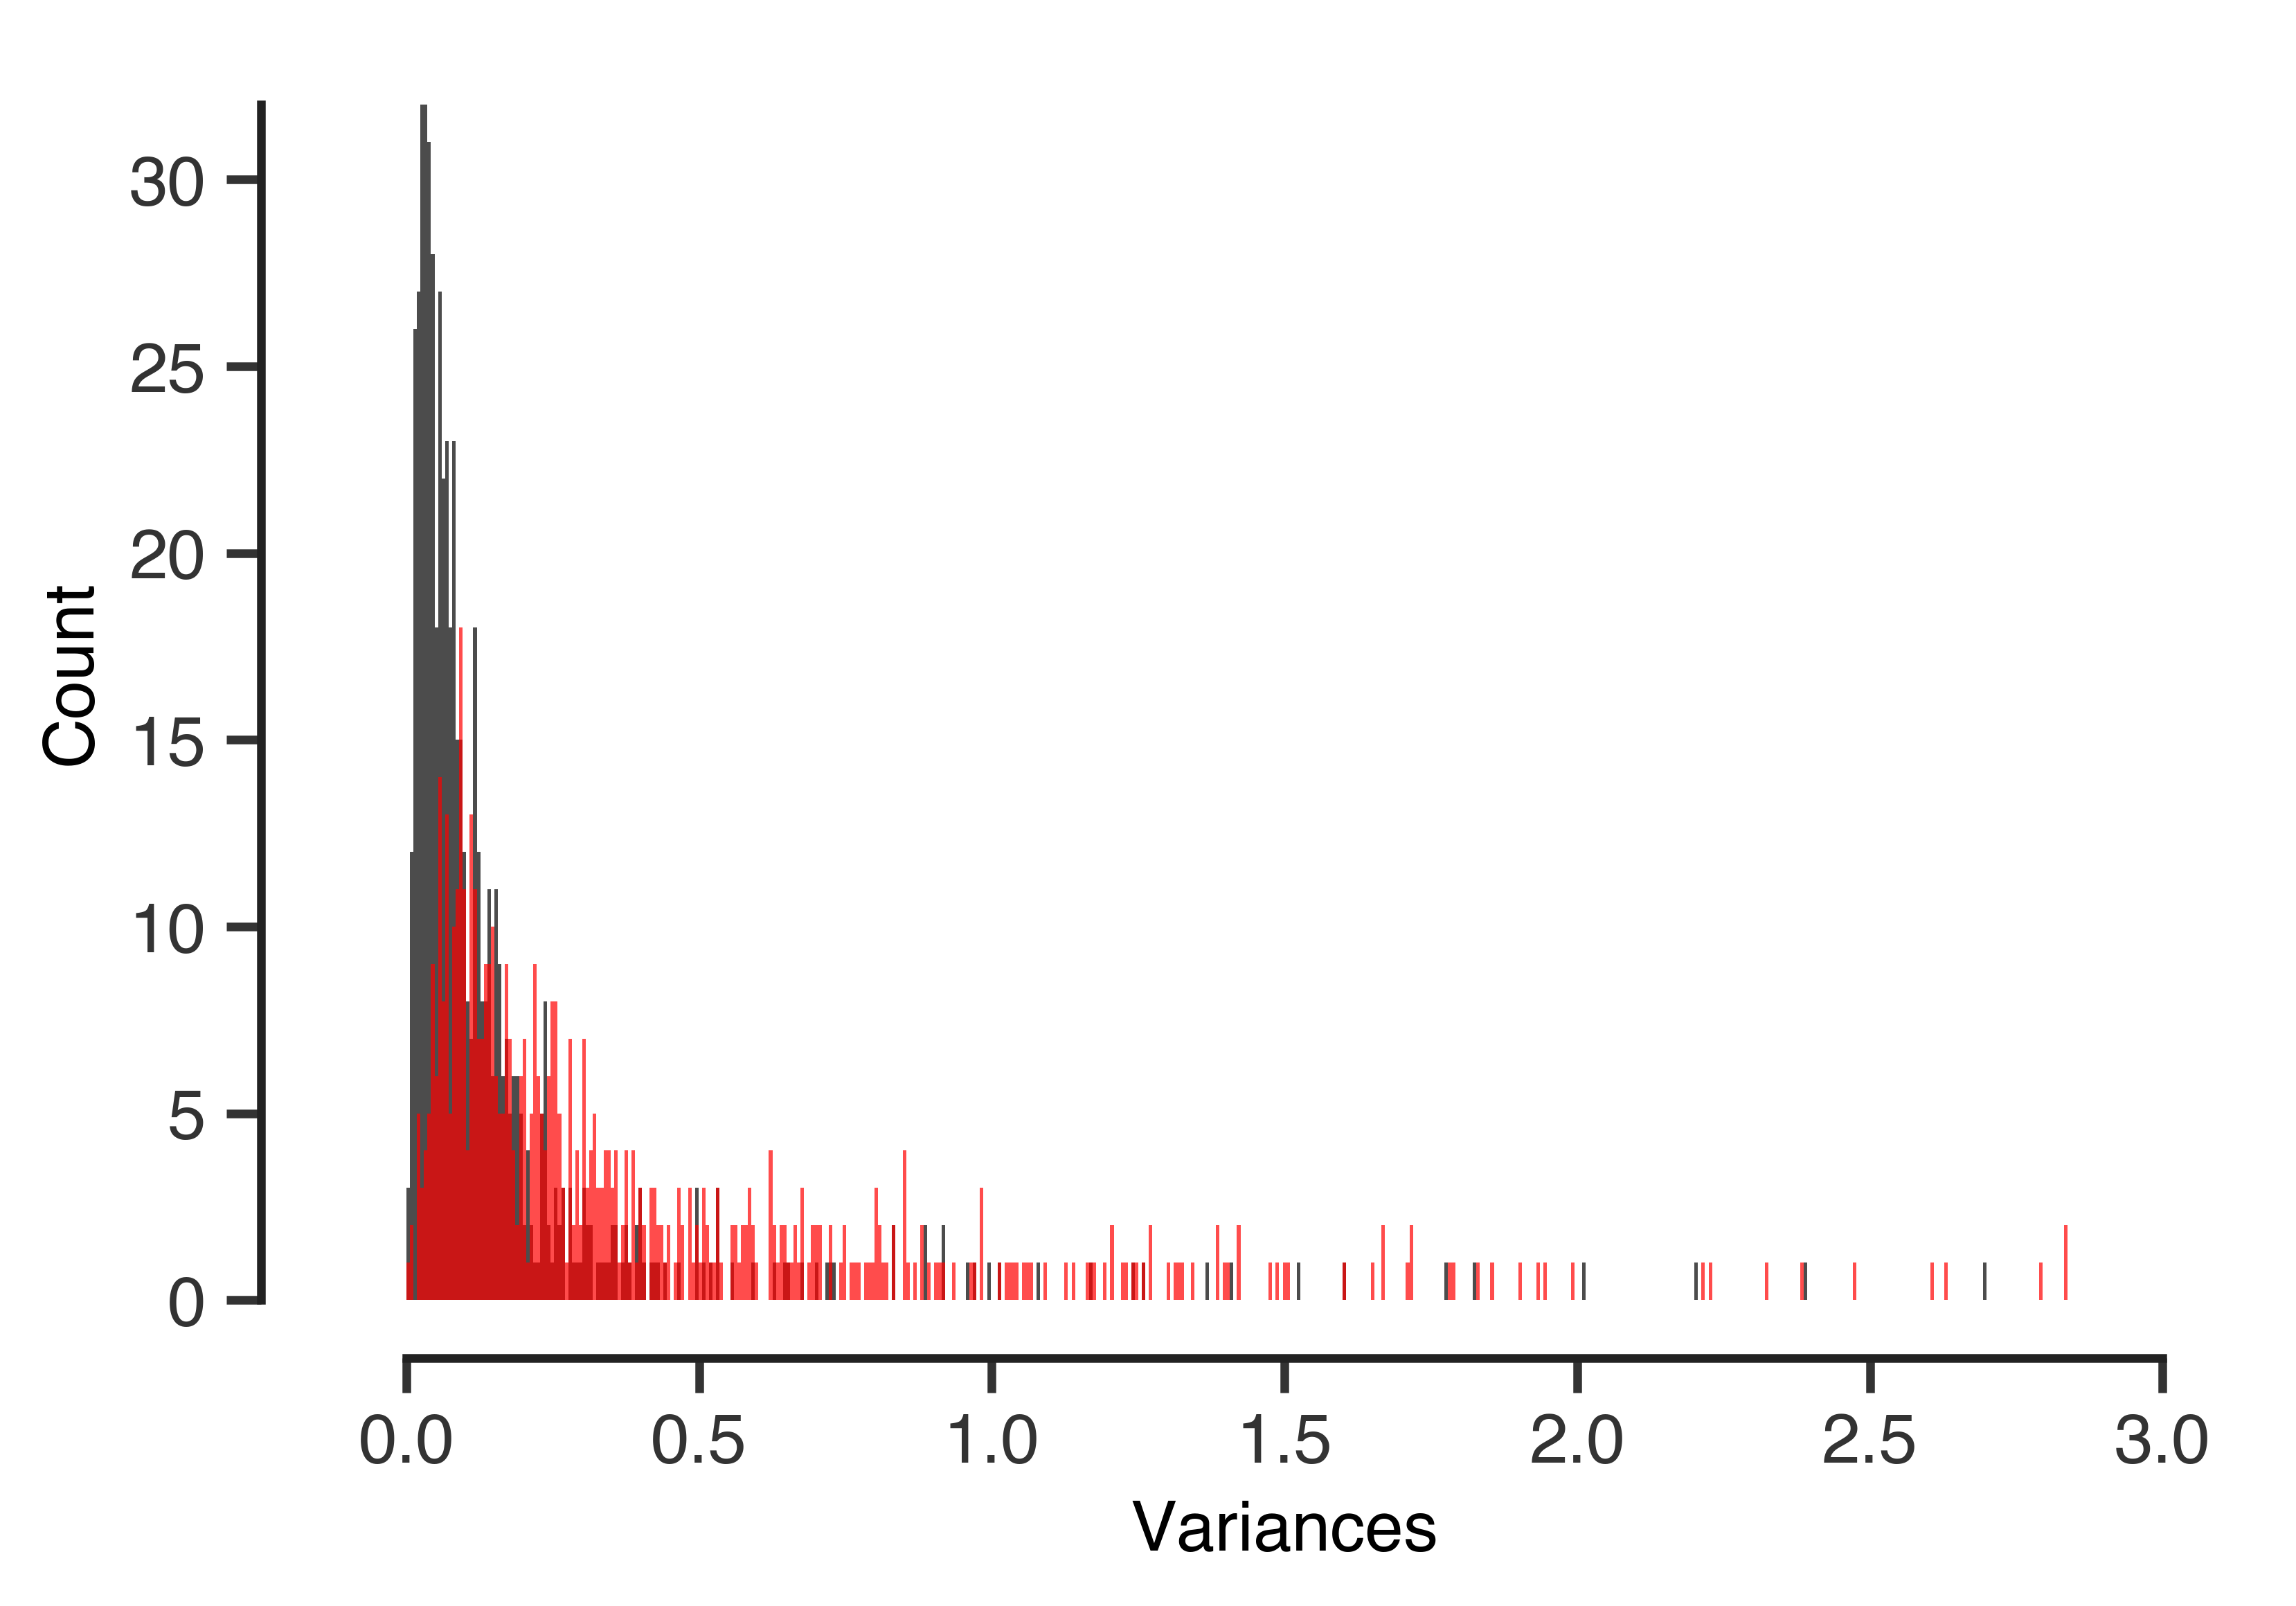

In [132]:
all_control_variances = np.array([control_variance[v] for v in variables]).flatten()
all_experimental_variances = np.array([experimental_variance[v] for v in variables]).flatten()
# all_control_variances = np.array([control_variance[v] for v in variables]).flatten()

bins = np.linspace(0,3,500)
bin_width = np.mean(np.diff(bins))

count_control, bins = np.histogram(all_control_variances, bins=bins)
count_experimental, bins = np.histogram(all_experimental_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_control, width=bin_width, color='k', alpha=.7)
plt.bar(bins[:-1] + bin_width/2.0, count_experimental, width=bin_width, color='r', alpha=.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.xlabel('Variances')
plt.ylabel('Count')

#### So far so good!

Zscore now the experimental data

In [134]:
normalized_experimental = collections.defaultdict(list)
for v in variables:
    normalized_experimental[v] = (experimental_list[v] - control_means[v])/control_std[v]

In [136]:
time_experimental = experimental_list['DPI']

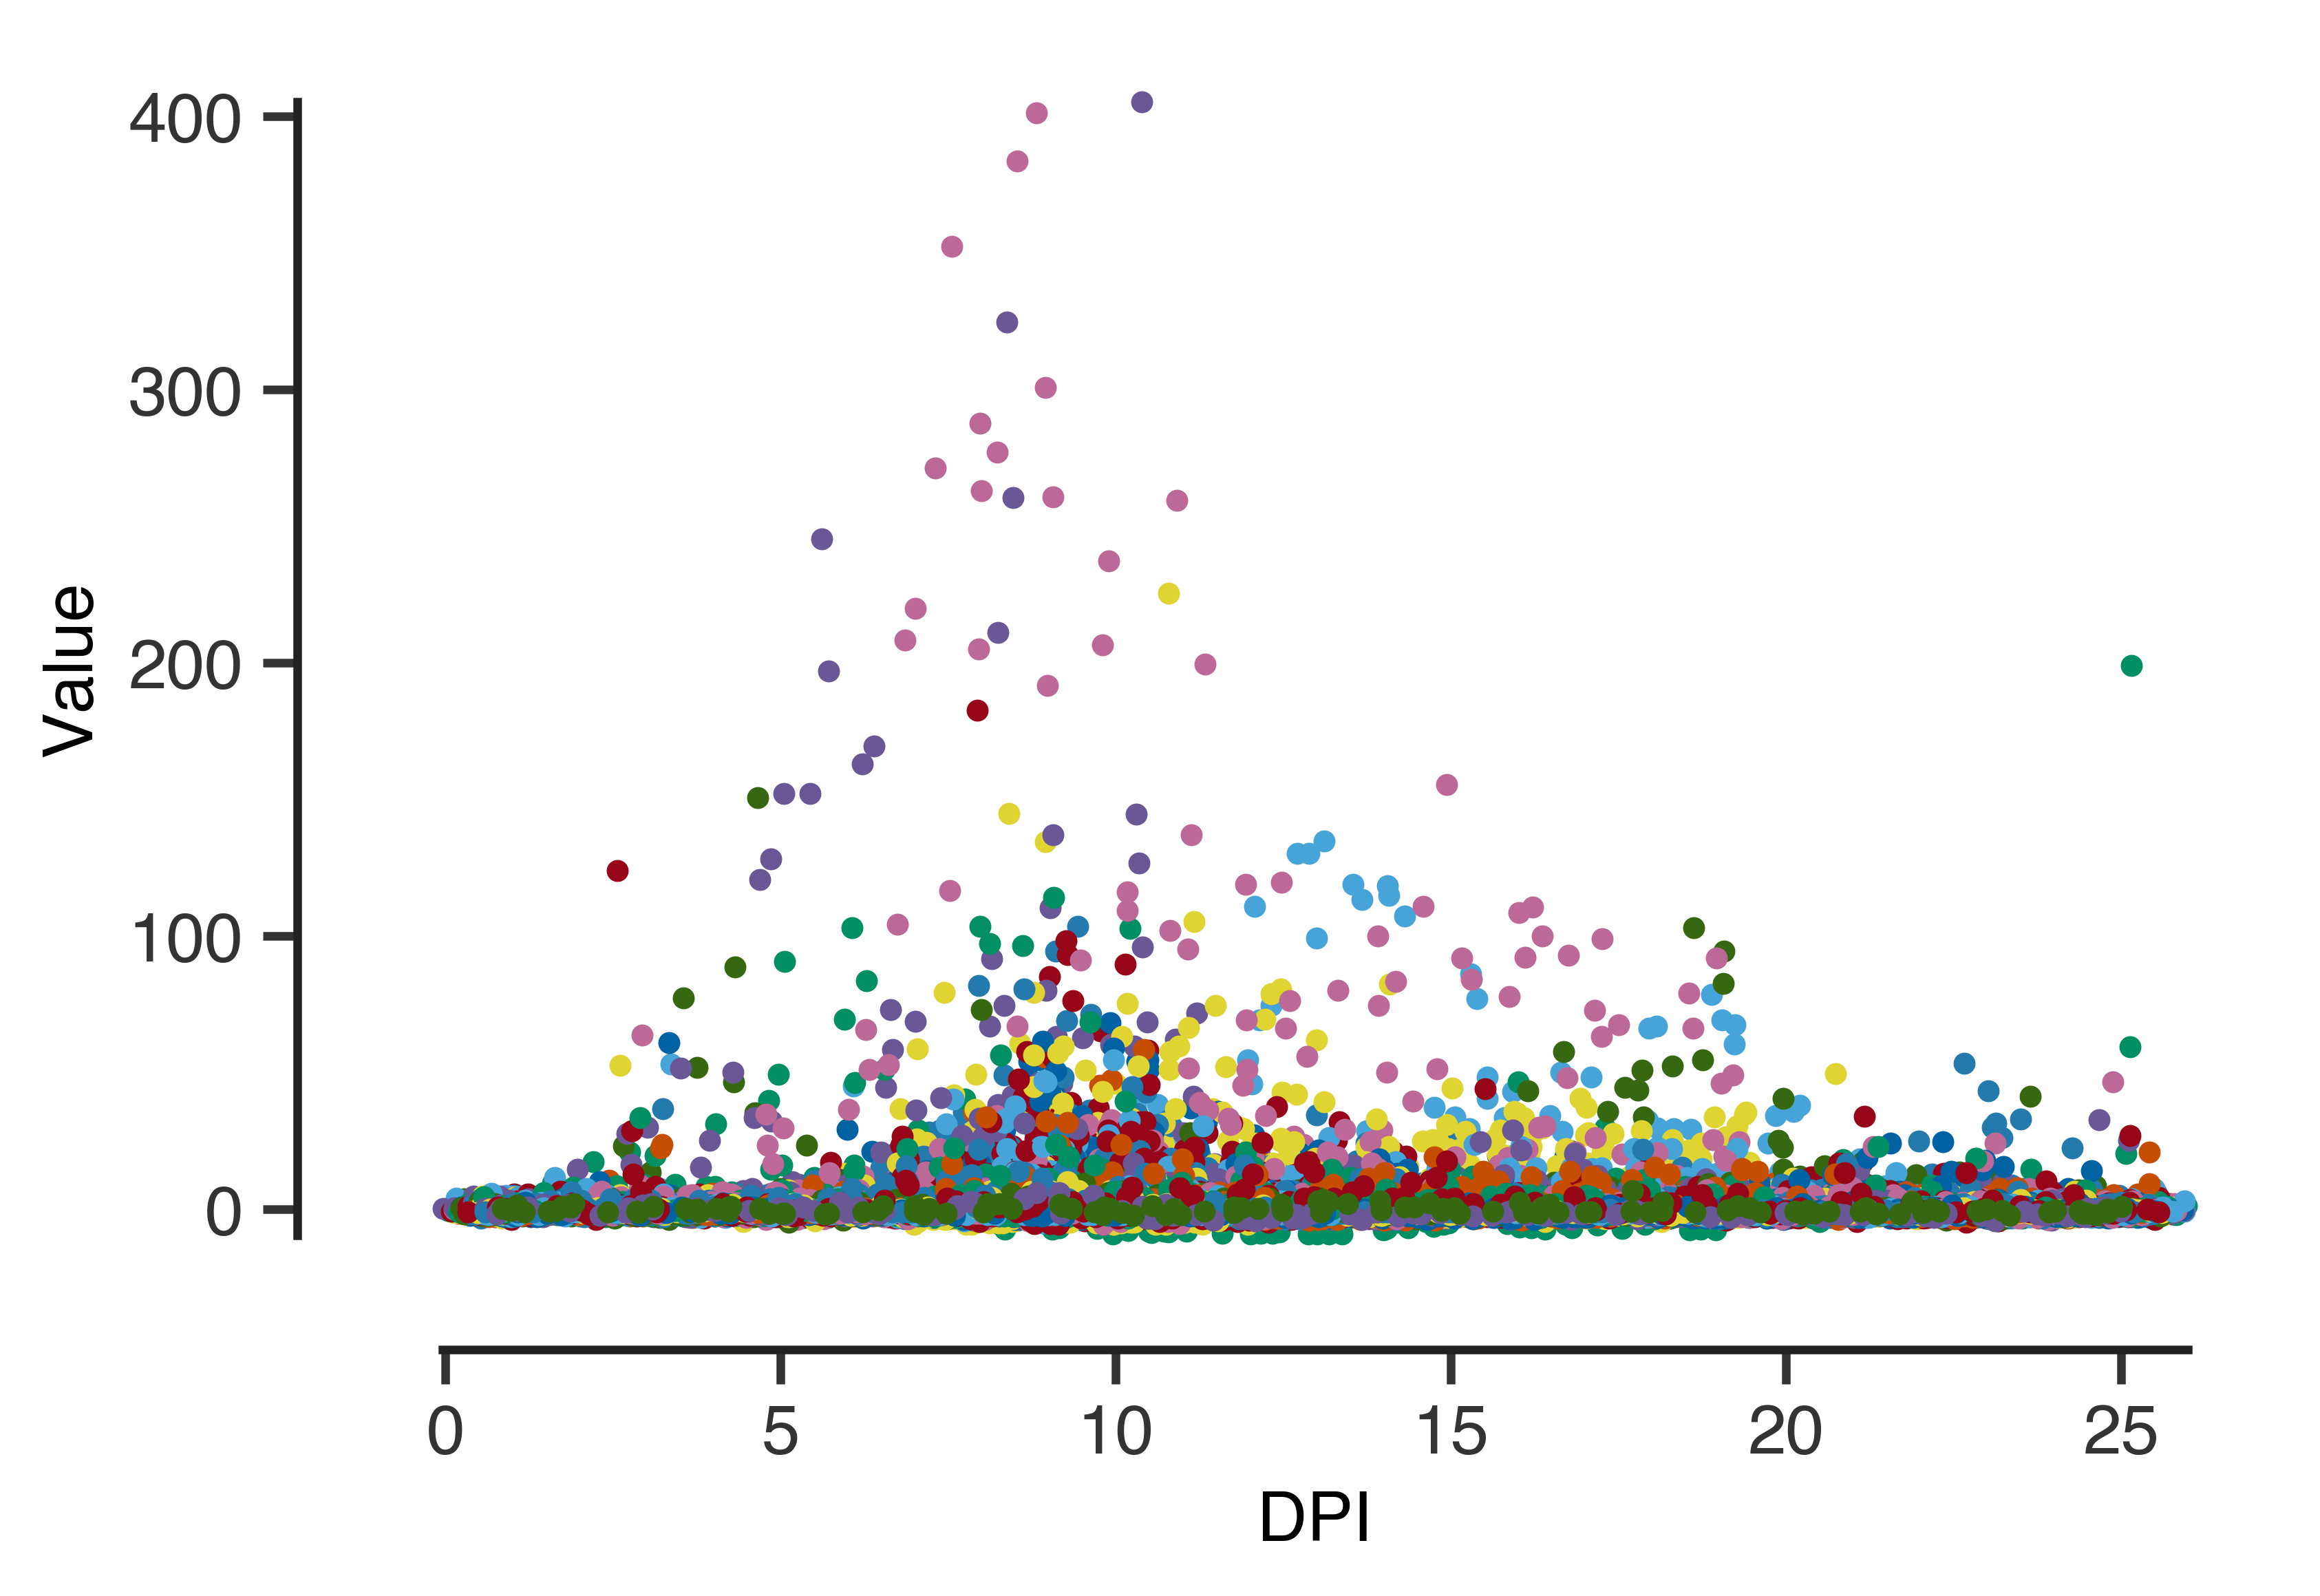

In [137]:
size = 8
for v in variables:
    plt.scatter(time_experimental+0.3*np.random.randn(len(normalized_experimental[v])),
                normalized_experimental[v], s=size)
    
# plt.scatter(time, control_list[variables[2]], s=size)
# plt.scatter(time, control_list[variables[6]], s=size)
plt.xlabel('DPI')
plt.ylabel('Value')
plotting.adjust_spines(plt.gca())

In [139]:
max(all_experimental_variances)

8305.0040956536632

In [143]:
for v in variables:
    if experimental_variance[v] > 100:
        print('%s has variance %0.2f' %(v, experimental_variance[v]))

AST has variance 106.02
inosine has variance 135.99
ALT has variance 425.59
taurochenodeoxycholate has variance 140.79
IFN-g has variance 150.67


After zscoring...

In [145]:
for v in variables:
    if np.nanvar(normalized_experimental[v]) > 100:
        print('%s has variance %0.2f' %(v, np.nanvar(normalized_experimental[v])))

dihomo-linoleoylcarnitine (C20:2)* has variance 144.13
Erythrocyte-B has variance 1283.37
formiminoglutamate has variance 300.95
AST has variance 832.14
glycosyl-N-palmitoyl-sphingosine (d18:1/16:0) has variance 227.26
margaroylcarnitine* has variance 191.28
ALT has variance 3070.93
pipecolate has variance 201.16
stearoylcarnitine (C18) has variance 276.38
MCP-1 has variance 442.20
2-docosahexaenoylglycerol (22:6)* has variance 111.49
isobutyrylcarnitine (C4) has variance 118.32
g/d T Cells has variance 338.77
orotate has variance 425.65
eicosenoylcarnitine (C20:1)* has variance 289.58
IL-12P70 has variance 335.20
methylsuccinate has variance 265.28
IL-3 has variance 170.30
arachidoylcarnitine (C20)* has variance 105.58
bilirubin (Z,Z) has variance 162.54
Erythrocyte-A has variance 186.70
Total Bilirubin has variance 135.88
IL-1a has variance 114.69
IL-23 has variance 333.02
IFN-g has variance 2098.81
itaconate has variance 8305.00
IL-2 has variance 277.02


In [144]:
np.max(all_experimental_variances)

8305.0040956536632

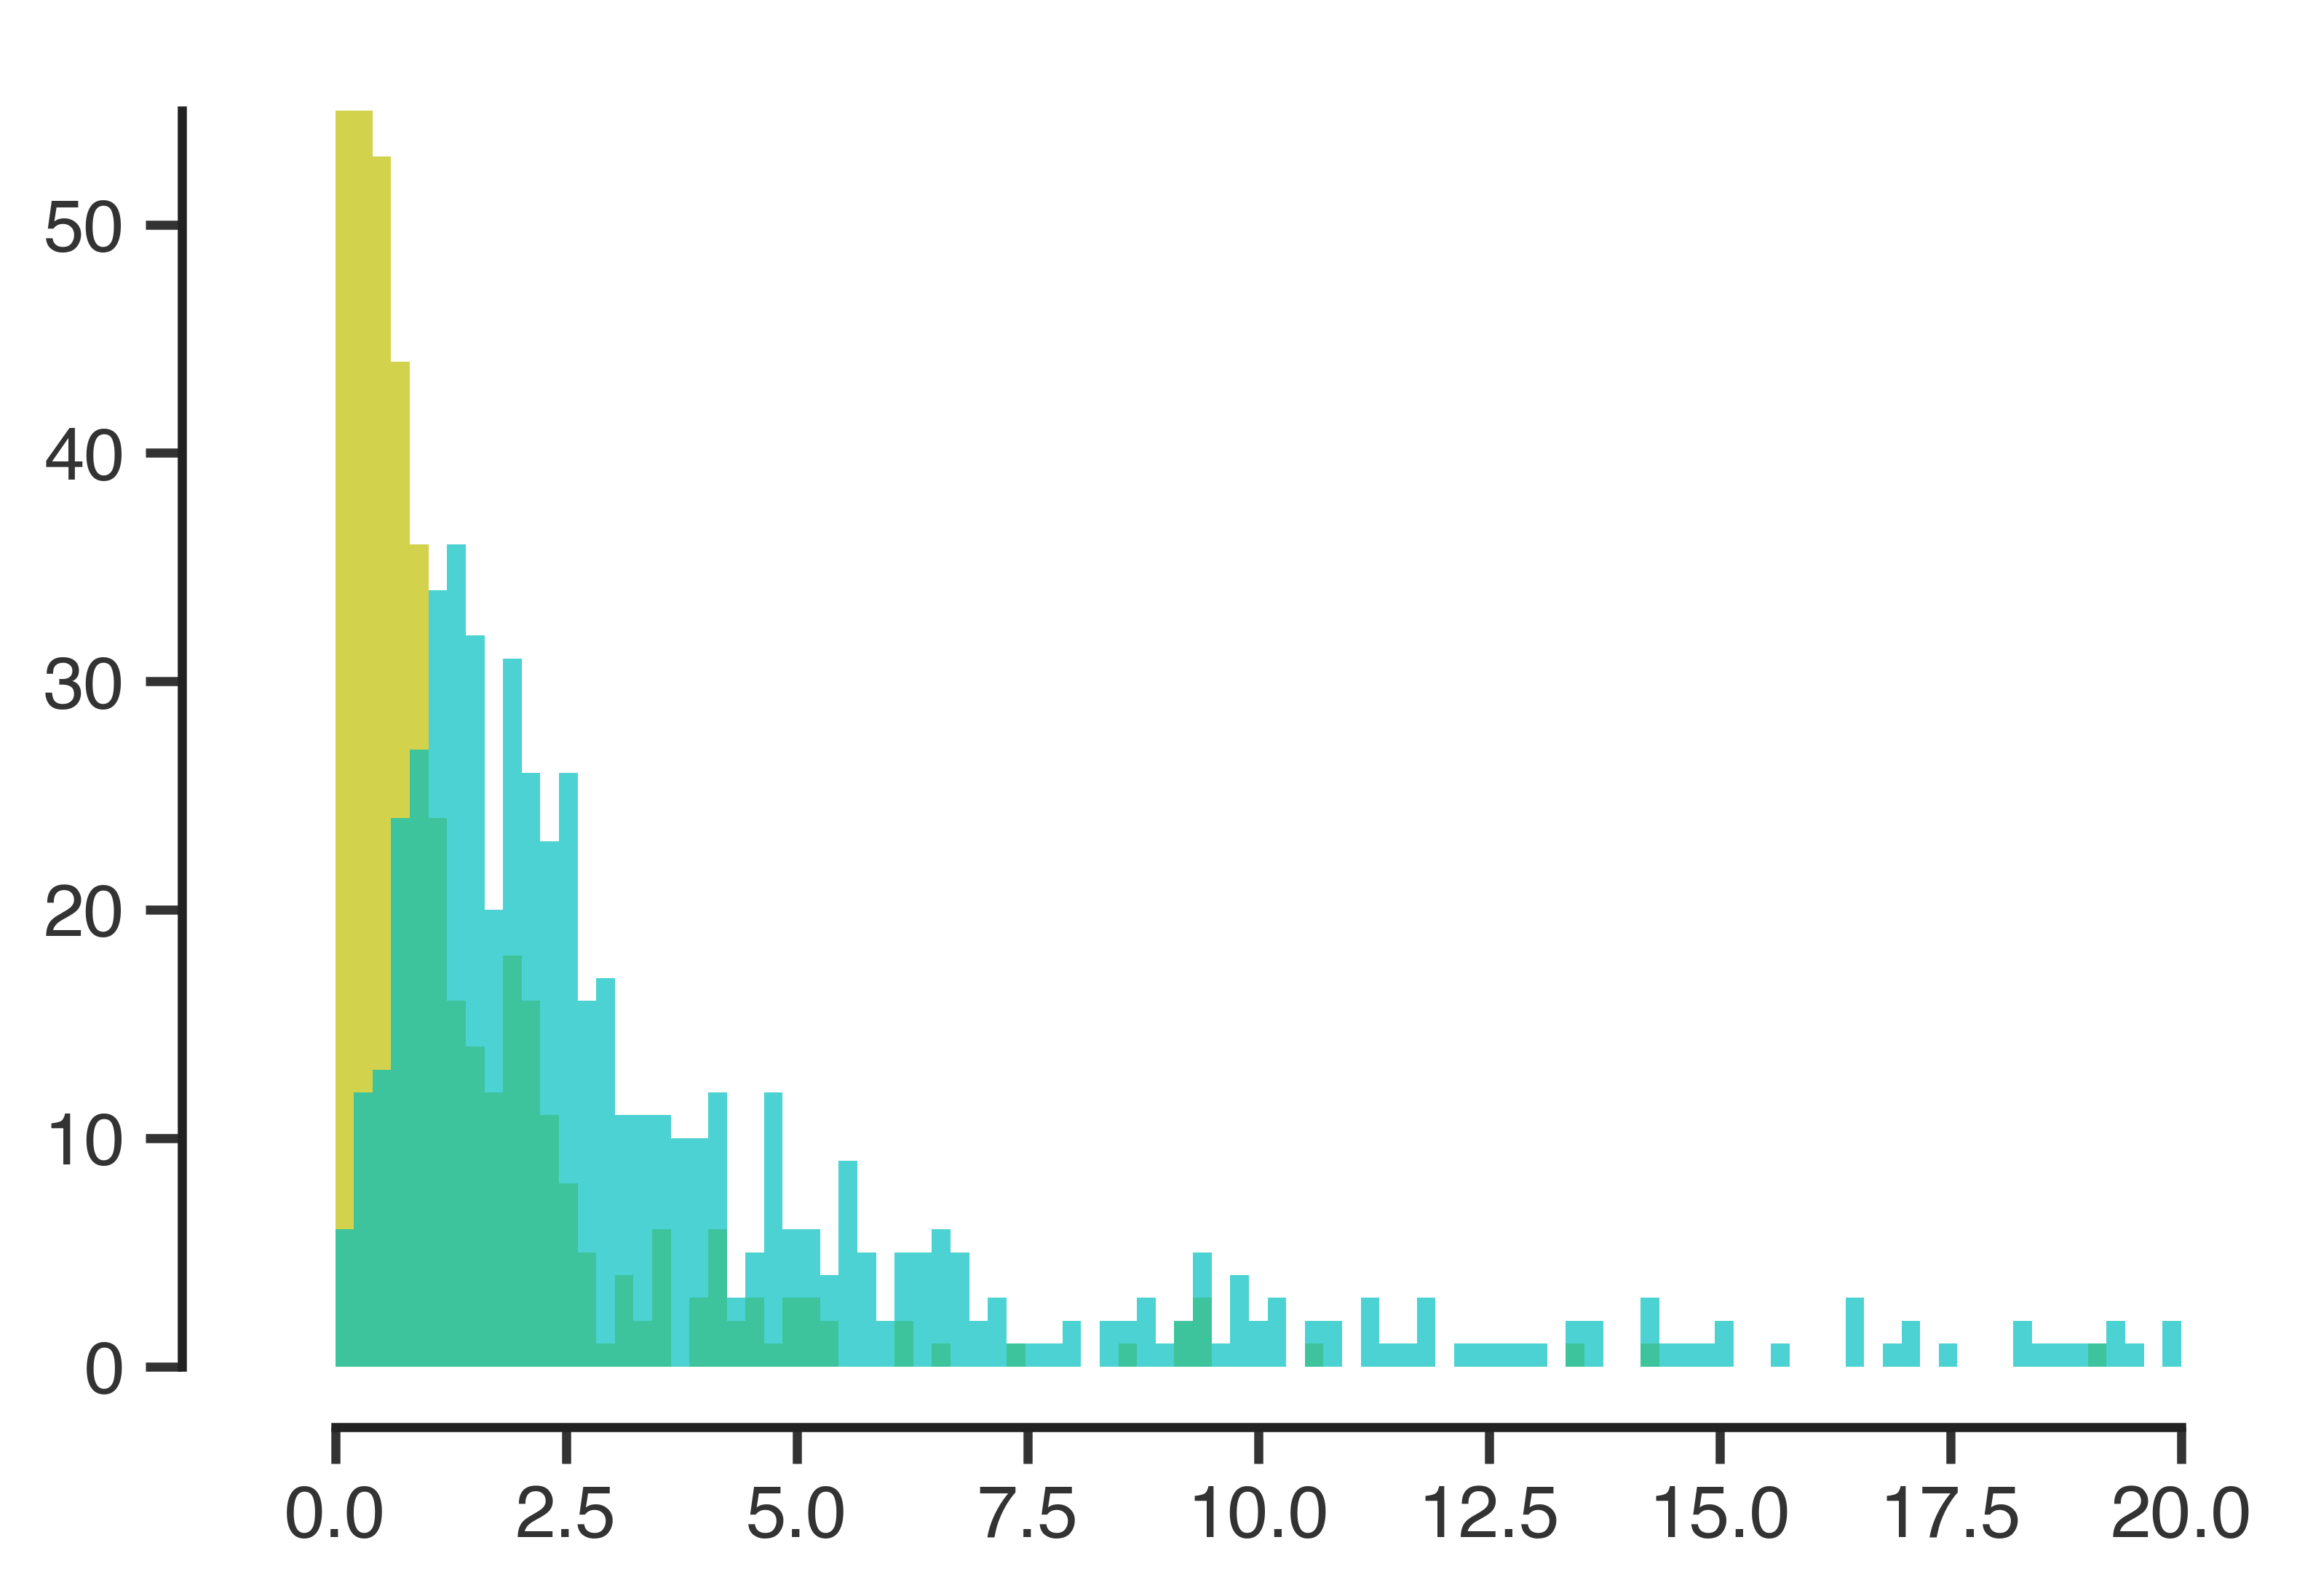

In [150]:
all_experimental_means = np.array([np.nanmean(normalized_experimental[v]) for v in variables]).flatten()
all_experimental_variances = np.array([np.nanvar(normalized_experimental[v]) for v in variables]).flatten()

# bins = np.linspace(min([min(all_experimental_means), min(all_experimental_variances)]),
#                    max([max(all_experimental_means), max(all_experimental_variances)]),500)

bins = np.linspace(0,20,100)
bin_width = np.mean(np.diff(bins))

count_means, bins = np.histogram(all_experimental_means, bins=bins)
count_variances, bins = np.histogram(all_experimental_variances, bins=bins)

plt.bar(bins[:-1] + bin_width/2.0, count_means, width=bin_width, color='y', alpha=0.7)
plt.bar(bins[:-1] + bin_width/2.0, count_variances, width=bin_width, color='c', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

# negative log likelihood

\begin{align}
- \log p(\mbox{data} | \theta) &= -\log (\exp (-(x - \mu)^2/\sigma^2)) \\
&= (x - \mu)^2 / \sigma^2
\end{align}

In [152]:
import scipy.stats as ss

In [175]:
my_gaussian = ss.norm(loc=0., scale=1.)

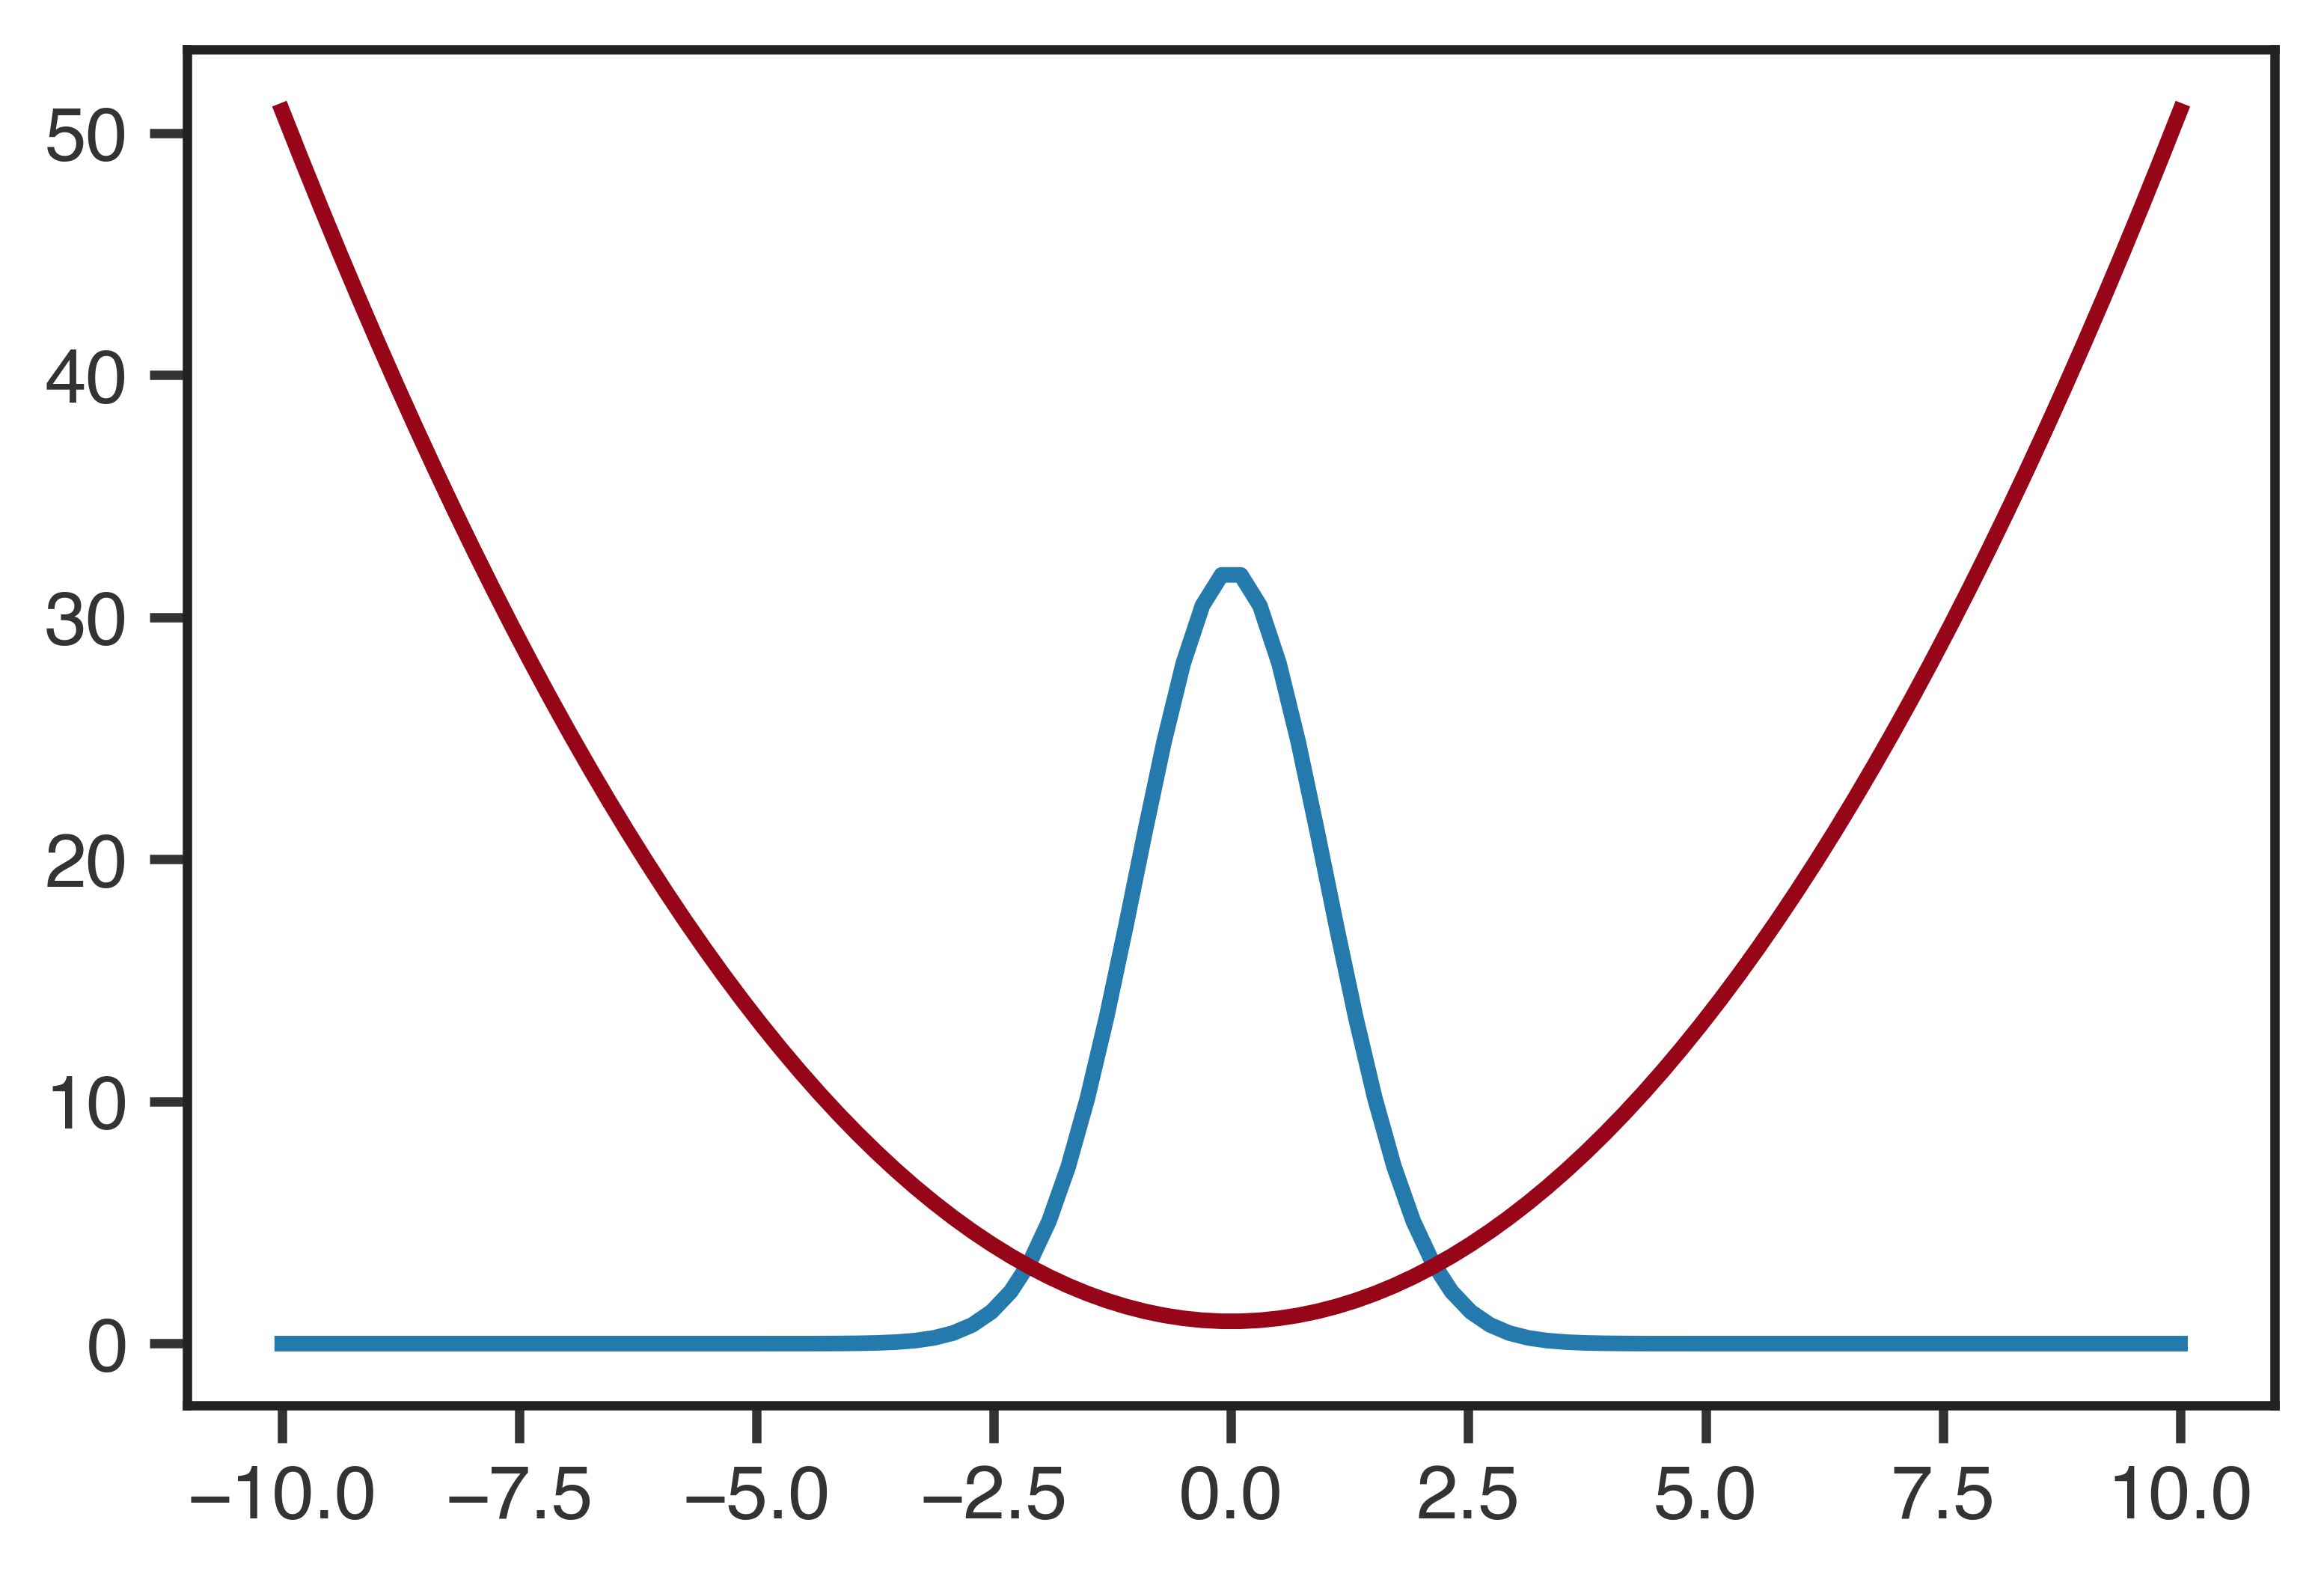

In [176]:
log_vals = [my_gaussian.logpdf([x]) for x in np.linspace(-10,10,100)]
vals = [my_gaussian.pdf([x]) for x in np.linspace(-10,10,100)]
plt.plot(np.linspace(-10,10,100), 80*np.array(vals))
plt.plot(np.linspace(-10,10,100), -np.array(log_vals))

In [174]:
np.min(-np.array(log_vals))

1.6133610938278768

In [178]:
neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    neg_logpdf = -standard_normal.logpdf(normalized_experimental[v])
    neg_ll[v] = neg_logpdf

# Histogram of negative log likelihoods

In [182]:
neg_ll[v]

array([  1.46668492,   2.18612842,   0.94528703,   1.19779799,
         1.052264  ,   3.06192912,   0.97695303,   1.46908951,
         1.23312782,   1.26560778,   1.56786069,   1.19082858,
         1.11638673,   1.5693296 ,   0.9929936 ,   1.35440516,
         1.47337526,   0.976935  ,   0.91893854,   1.24173603,
         1.89168369,   1.47367273,   1.01130044,   2.13861071,
         1.98113405,   0.95526024,   1.4726691 ,   1.75546188,
         2.021599  ,   2.29971279,   0.94143539,   1.63558463,
         1.17307305,   2.85812238,   1.81243329,   2.94821268,
         2.25156063,   1.33281807,   3.33465144,   1.81550368,
         2.60897277,   0.97579831,   0.94911239,   1.41157062,
         1.47939578,   3.00958973,   1.23472511,   0.94505655,
         1.74256545,   3.38516128,   2.68577014,   2.61277212,
         0.98207007,   1.19082858,   1.80208029,   1.00134895,
         2.43254222,   1.01464577,   1.67843252,   1.23126944,
         1.37343891,   7.71931422,   5.68333352,   4.82

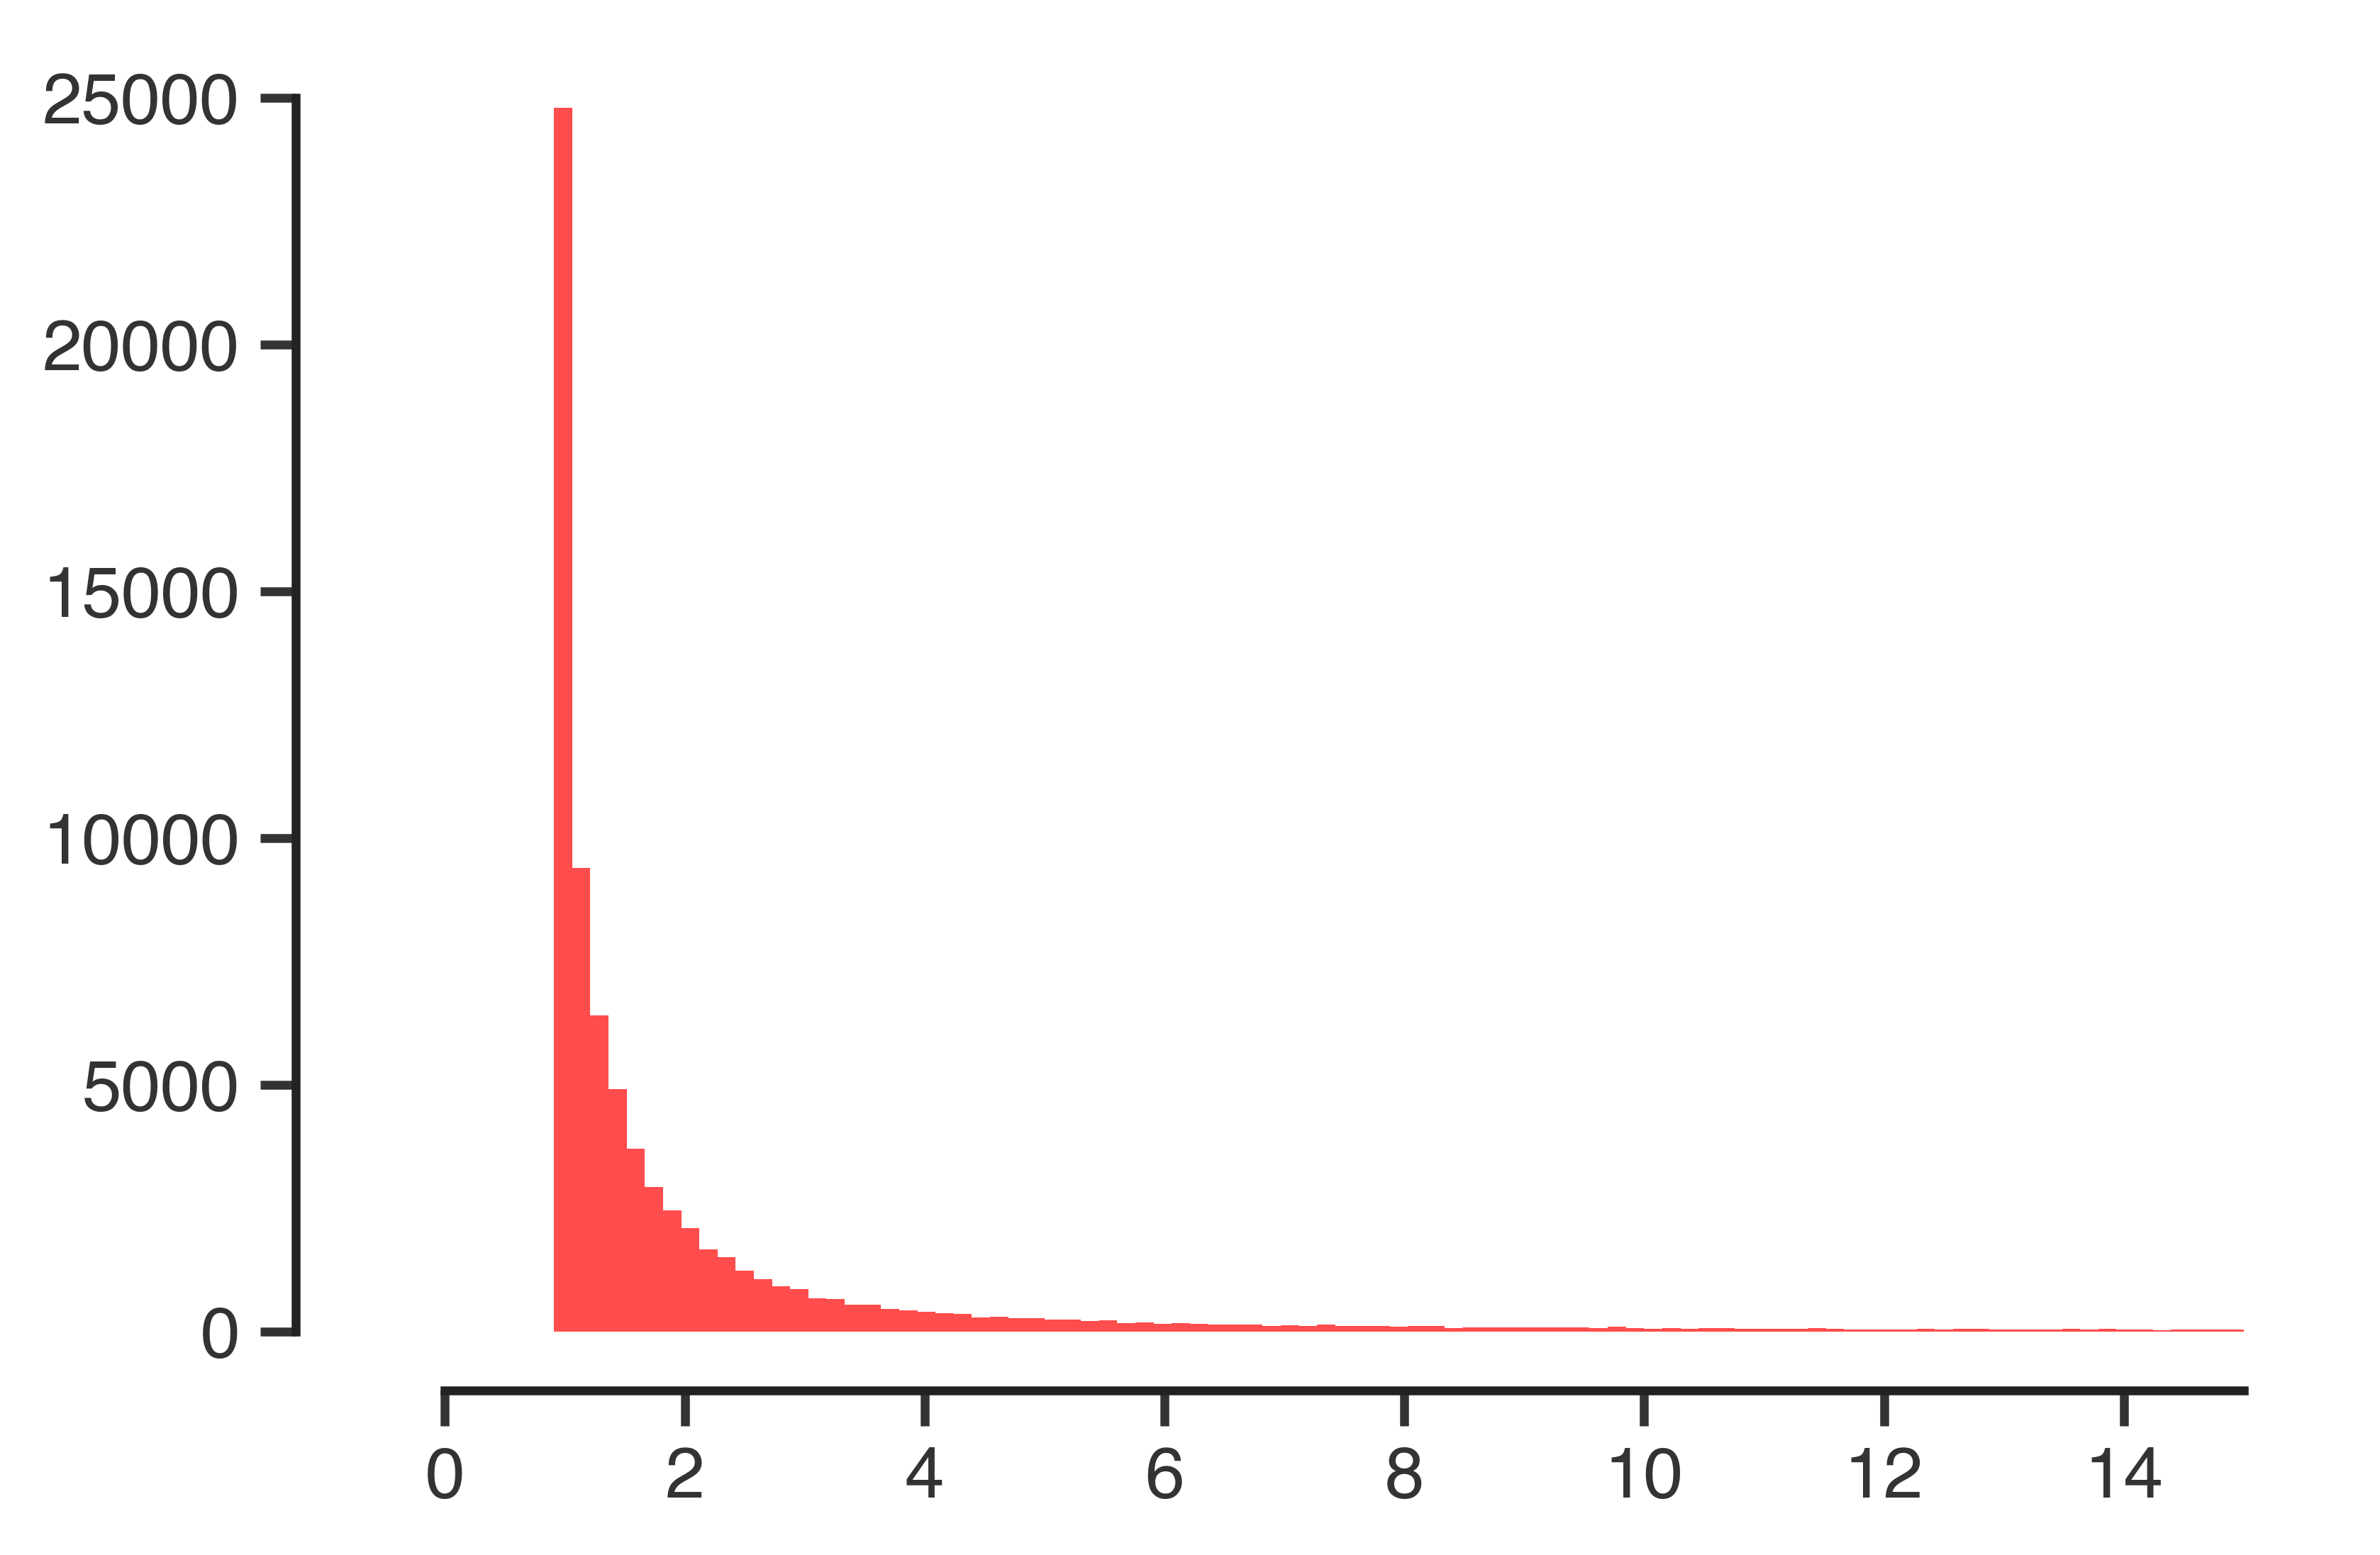

In [187]:
all_nlls = np.array([neg_ll[v] for v in variables]).flatten()

bins = np.linspace(0,15,100)
count, bins = np.histogram(all_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())

# Sum of log likelihoods (aka product of likelihoods)  
(and max)

In [188]:
sum_neg_ll = collections.defaultdict(list)
max_neg_ll = collections.defaultdict(list)
# fit gaussian to control data for each variable!
# but wait, we don't have to! we already normalized
standard_normal = ss.norm(loc=0., scale=1.0)

for v in variables:
    neg_logpdf = -standard_normal.logpdf(normalized_experimental[v])
    sum_neg_ll[v] = np.sum(neg_logpdf)
    max_neg_ll[v] = np.max(neg_logpdf)

In [191]:
np.min(sum_nlls)

117.05989522630404

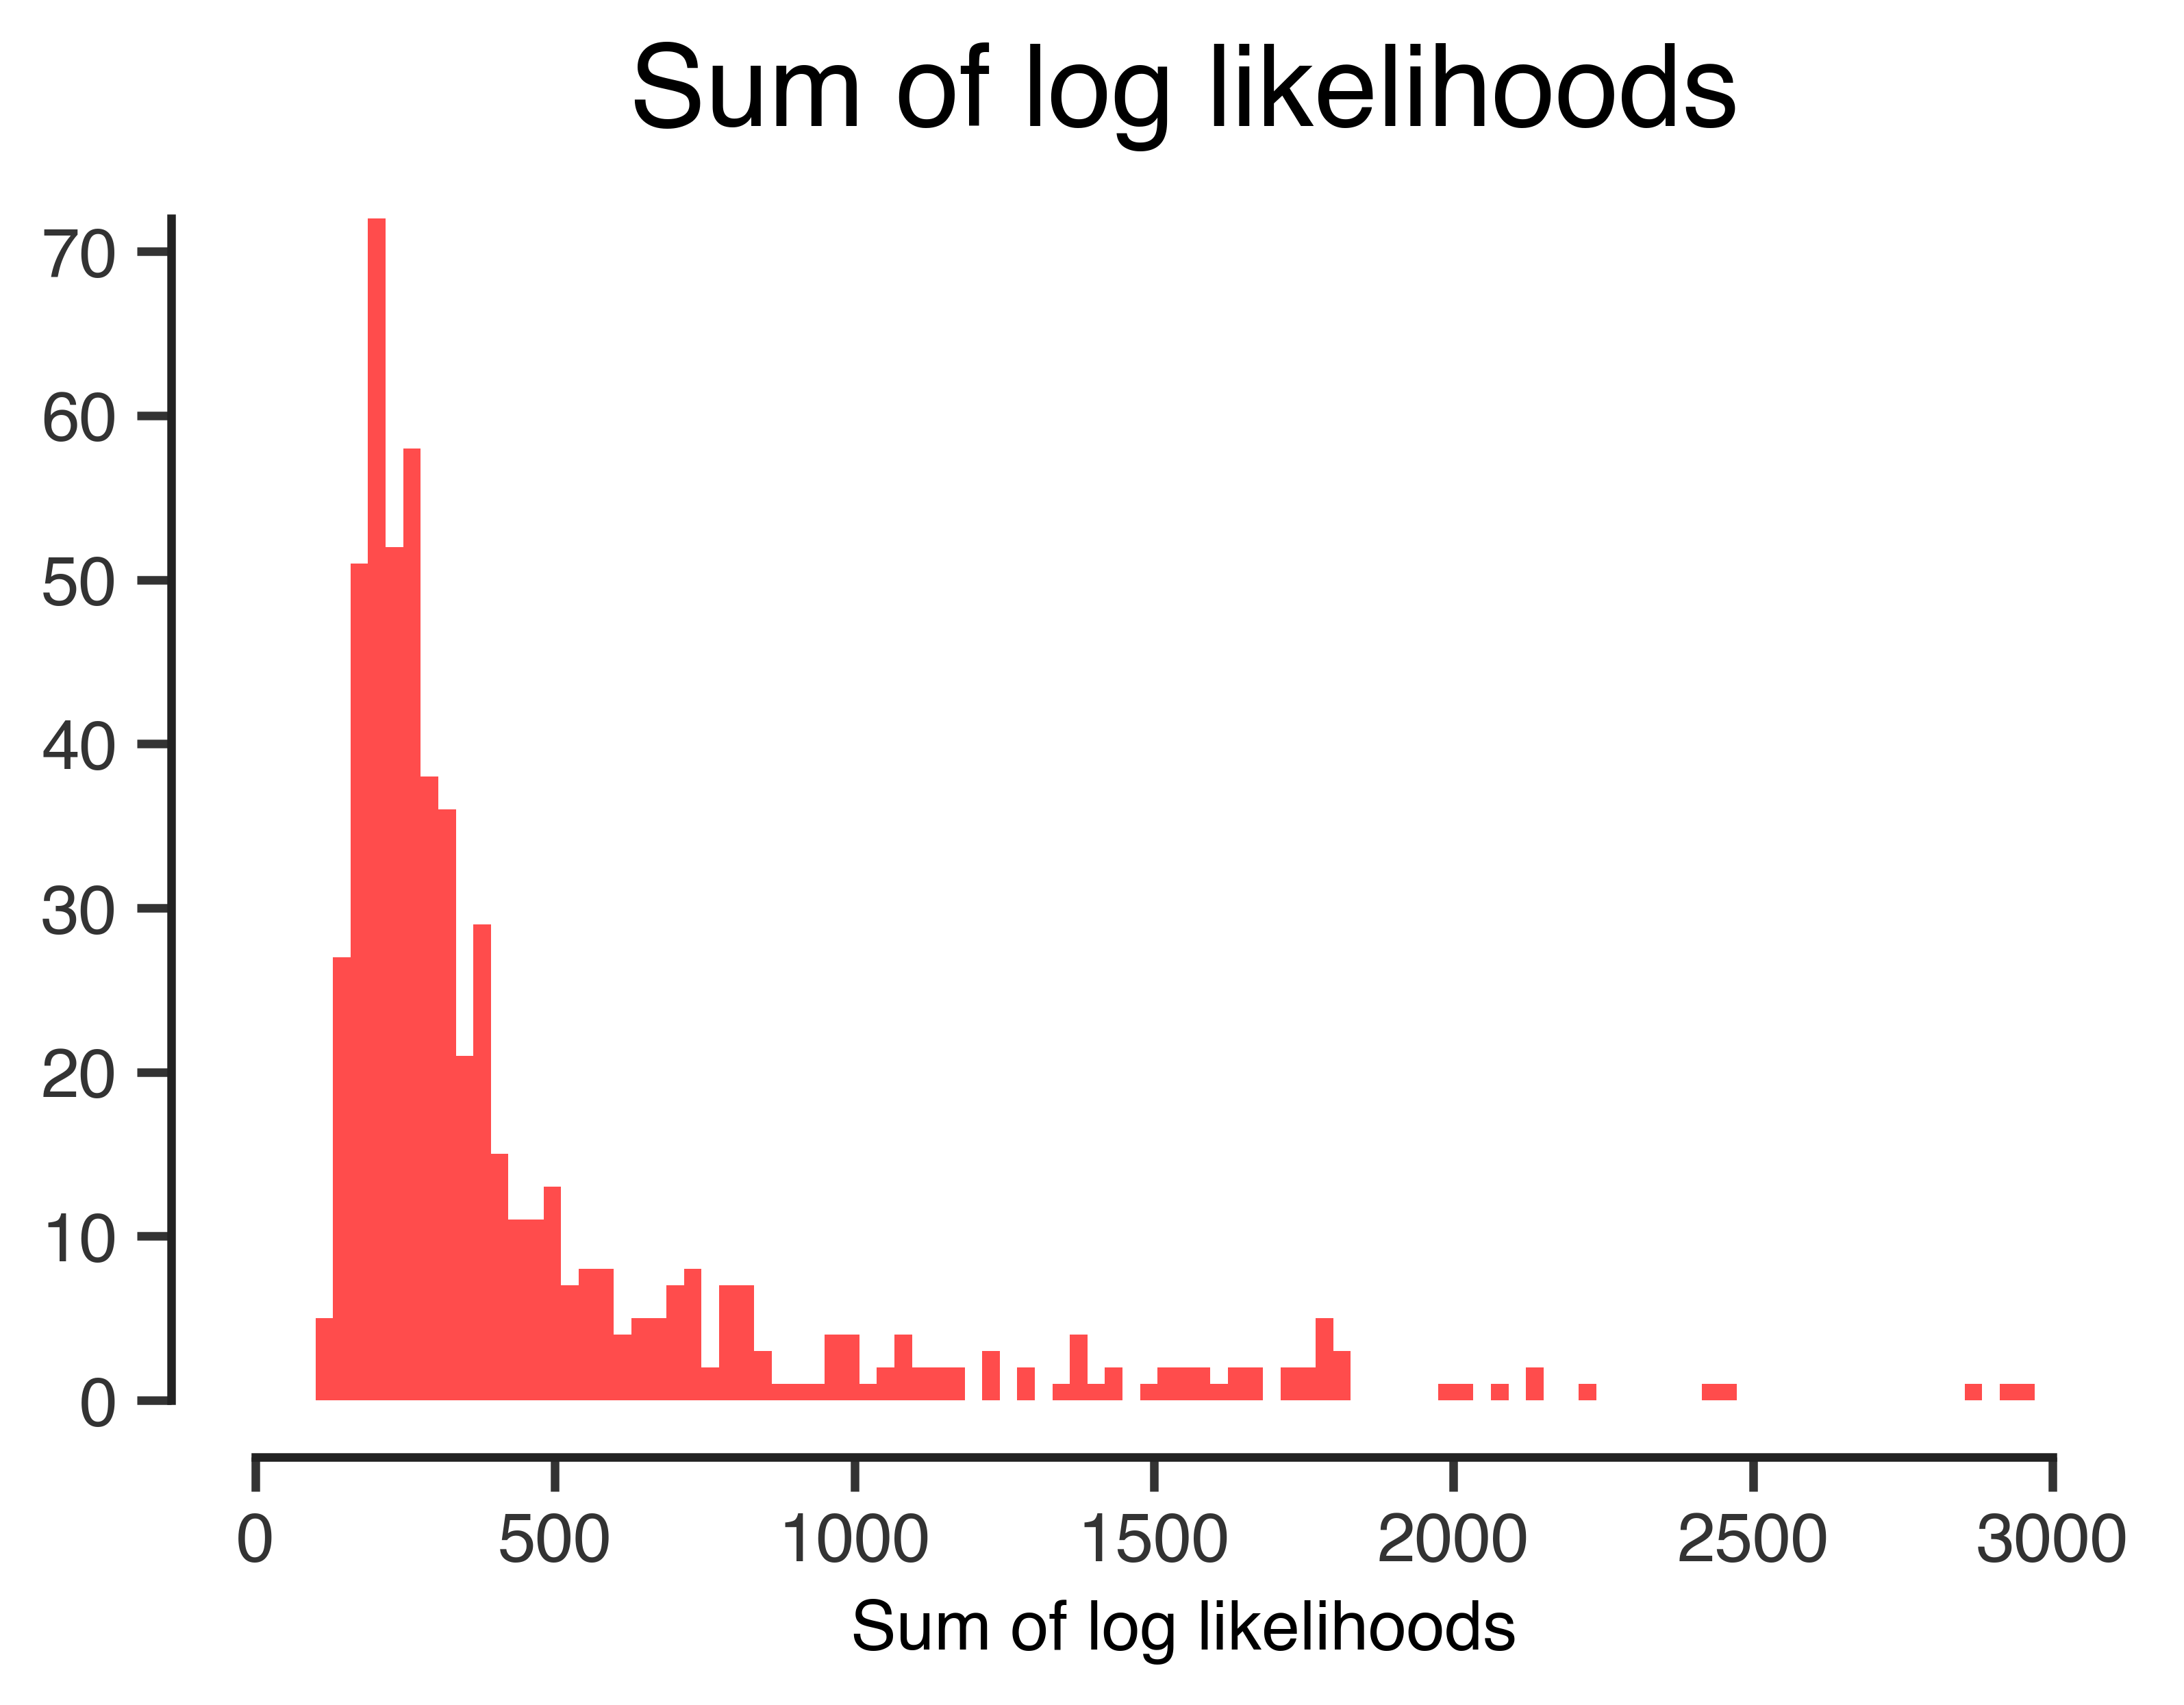

In [204]:
sum_nlls = np.array([sum_neg_ll[v] for v in variables]).flatten()
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


bins = np.linspace(100,3000,100)
count, bins = np.histogram(sum_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Sum of log likelihoods')
plt.xlabel('Sum of log likelihoods')

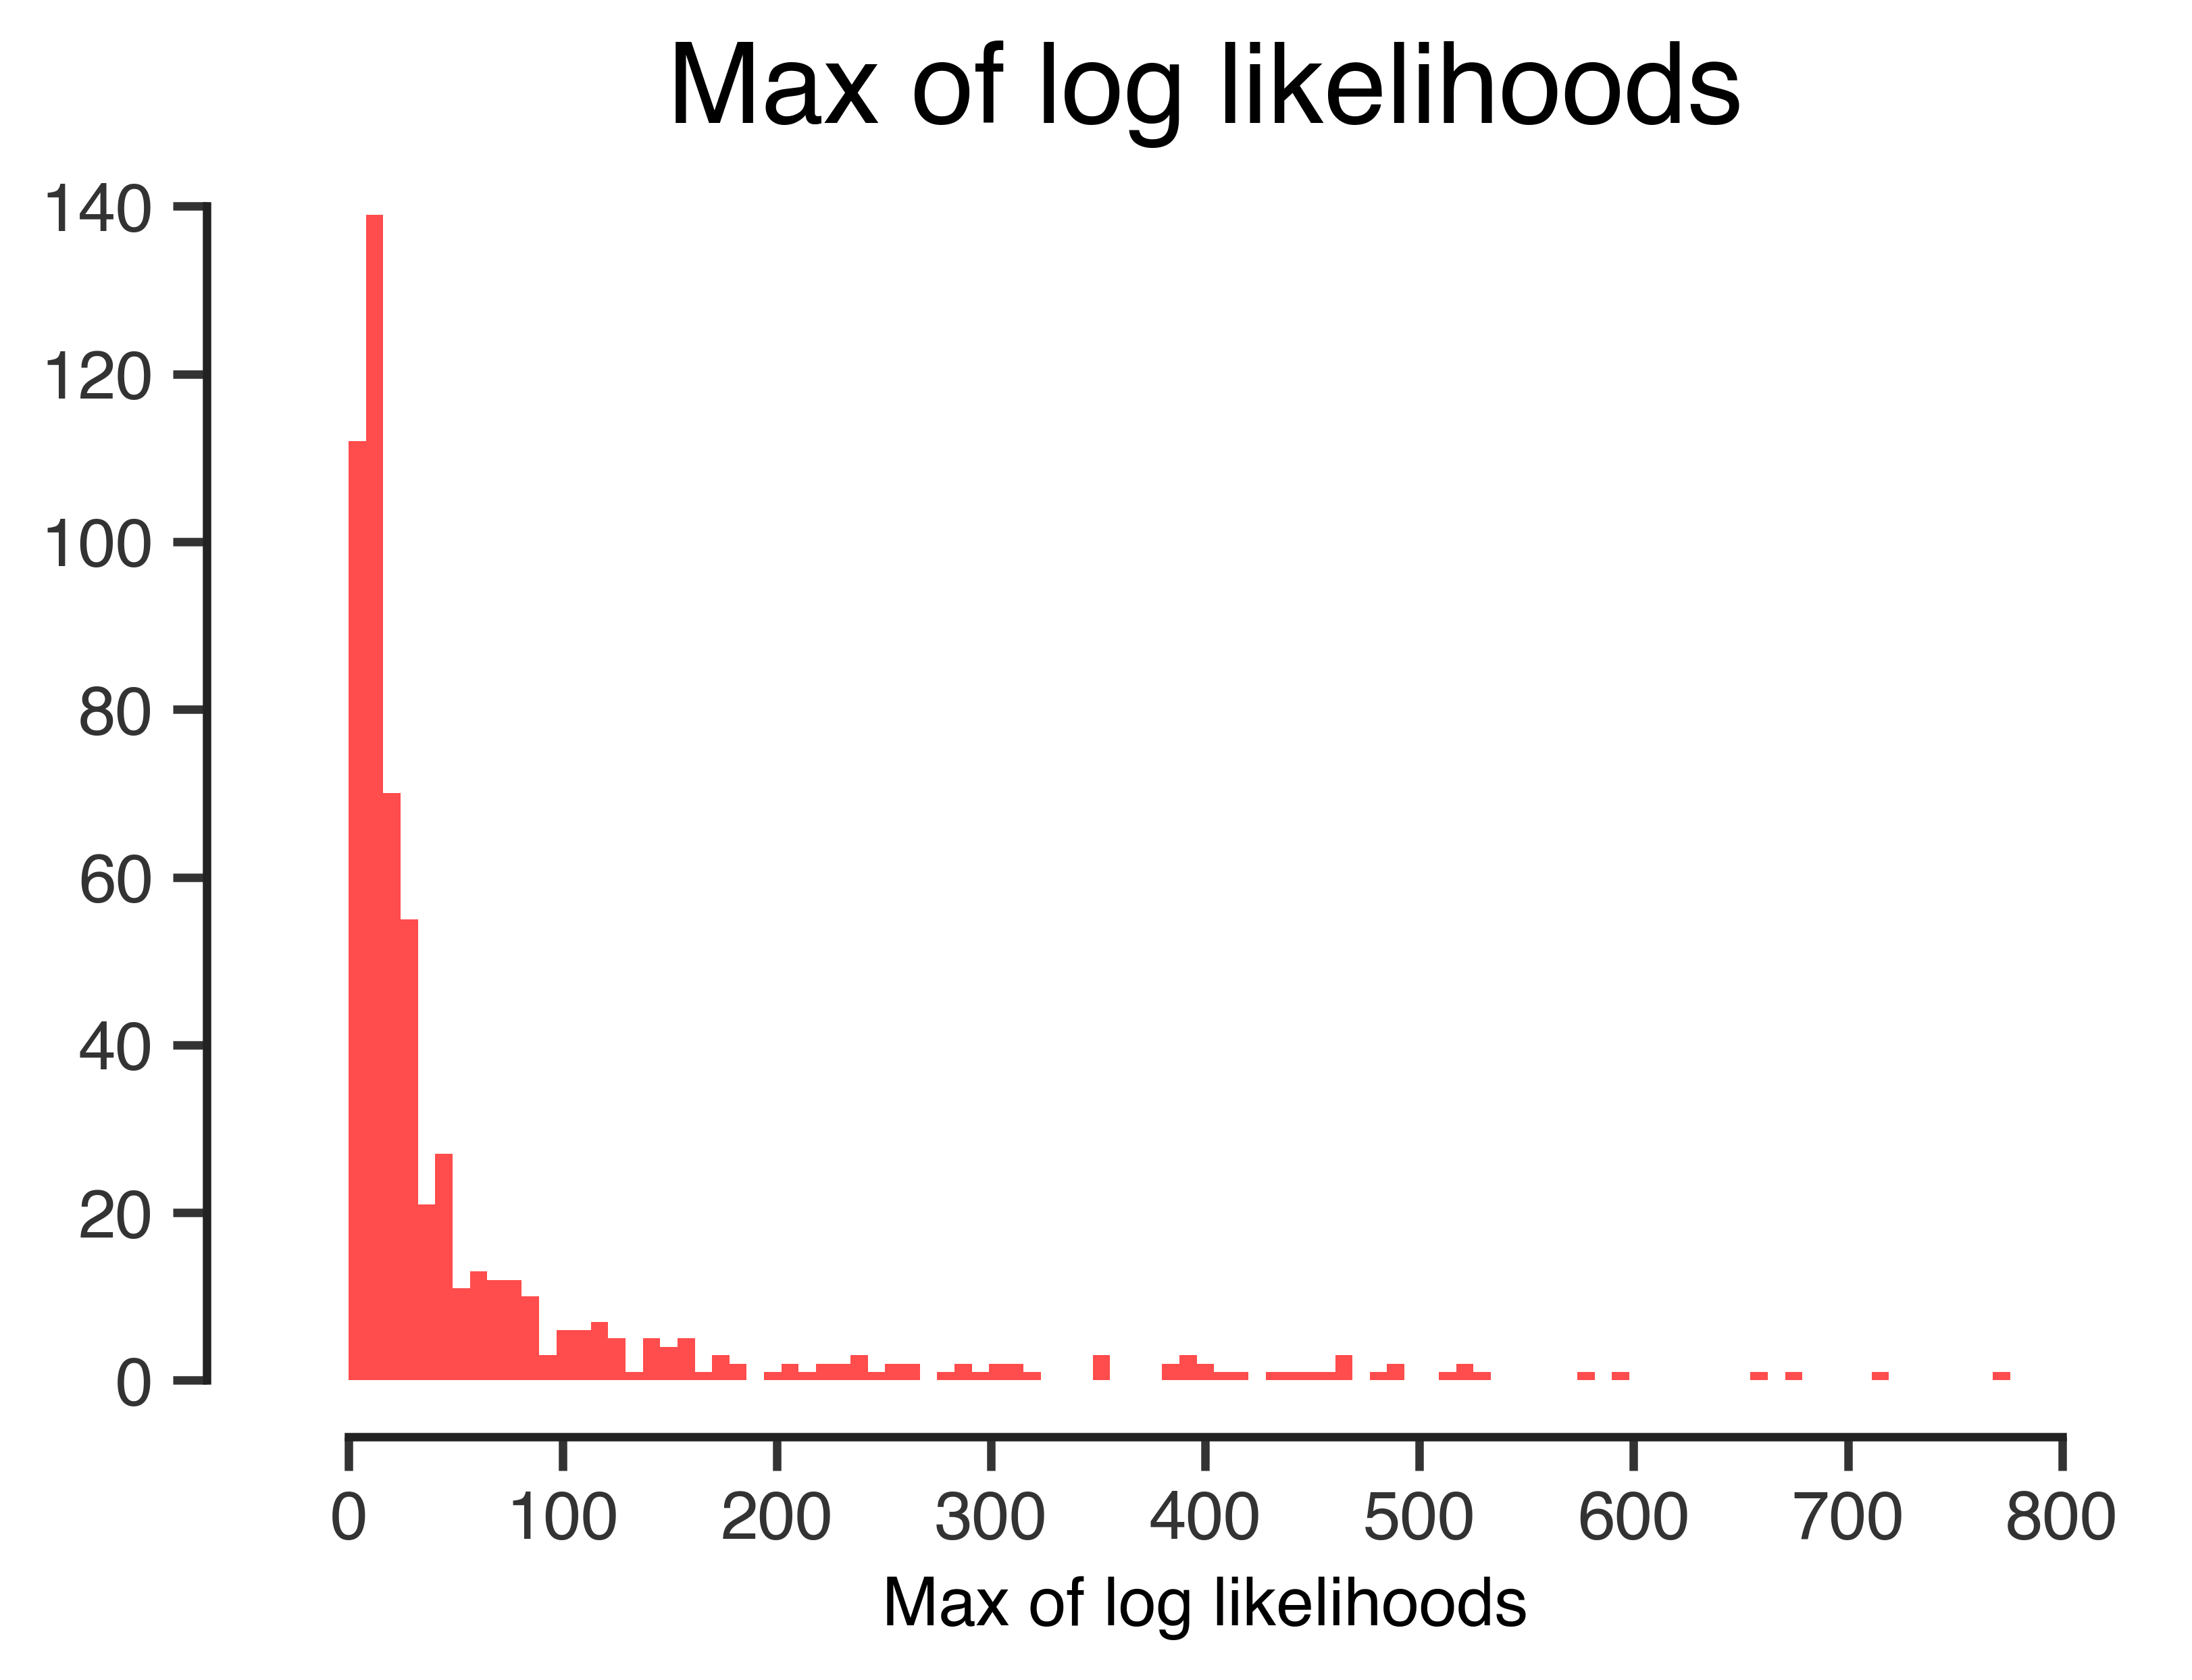

In [209]:
max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()
# max_nlls = np.array([max_neg_ll[v] for v in variables]).flatten()


bins = np.linspace(0,800,100)
count, bins = np.histogram(max_nlls, bins=bins)
bin_width = np.mean(np.diff(bins))

plt.bar(bins[:-1] + bin_width/2.0, count, width=bin_width, color='r', alpha=0.7)
# plt.xscale('log')
plotting.adjust_spines(plt.gca())
plt.title('Max of log likelihoods')
plt.xlabel('Max of log likelihoods')

In [199]:
import operator

In [202]:
least_likely_data = sorted(sum_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [203]:
for i in range(10):
    print(least_likely_data[i])

('itaconate', 810230.33516927483)
('ALT', 214907.65286574414)
('IFN-g', 160192.35013916669)
('Erythrocyte-B', 114381.71793760544)
('AST', 59145.876309140127)
('orotate', 39470.331234565077)
('MCP-1', 33171.656903271105)
('methylsuccinate', 28122.900710049842)
('g/d T Cells', 26715.801465181976)
('IL-12P70', 23474.289876918501)


In [210]:
least_likely_max_data = sorted(max_neg_ll.items(), key=operator.itemgetter(1), reverse=True)

In [211]:
for i in range(10):
    print(least_likely_max_data[i])

('ALT', 82133.847392006996)
('itaconate', 80561.748939807425)
('IFN-g', 30139.139566754569)
('AST', 25417.025016032429)
('IL-23', 19815.170565516546)
('IL-2', 16697.116178945191)
('IL-12P70', 11358.393886147958)
('formiminoglutamate', 10472.459249917343)
('Erythrocyte-B', 9100.3874418751966)
('IL-3', 7689.5385224384036)
